# Table of Contents



>[1. Import](#import)

>>[1.1. Import the needed Libraries](#importlibraries)

>>[1.2. Import Dataset](#importdataset)

>[2. Initial Analysis](#initialAnalysis)

>>[2.1 Descriptive Statistics](#descriptivestatistics)

>>>[2.1.1 Numeric Features](#numericfeatures)

>>>[2.1.2 Non-Numeric Features](#nonnumericfeatures)

>[3. Data Visualization](#datavisualization)

>>[3.1. Numeric Variables' Univariate Analysis](#numericvariablesuni)

>>>[3.1.1 'customer_age' , 'vendor_count', 'product_count', 'is_chain', 'first_order' and 'last_order'](#customerage)

>>>[3.1.2 'CUI_(...)'](#cui)

>>>[3.1.3 'HR_(...)'](#hr)

>>>[3.1.4 'DOW_(...)'](#dow)

>>[3.2. Categorical Variables' Univariate Analysis](#categoticalvariablesuni)

>>>[3.2.1 'customer_region'](#customerregion)

>>>[3.2.2 'last_promo'](#lastpromo)

>>>[3.2.3 'payment_method'](#paymentmethod)

>>[3.3. Numerical Variables' Bivariate Analysis](#numericbivariate)

>>>[3.3.1 customer_age per product_count](#customerageperproductcount)

>>>[3.3.2 customer_age per Cuisine](#customeragepercuisine)

>>>[3.3.3 Cuisine Spending per Age (Group)](#cuisineperage)

>>>[3.3.4 first_order per last_order](#firstperlastorder)

>>>[3.3.5 customer_age , vendor_count and product_count](#customeragepervendercount)

>>>[3.3.6 Day of the week by Hour of the day](#daybyhour)

>>>[3.3.7  Metric Variables' Correlation Matrix](#corrmatrix)

>>[3.4. Categorical Variables' Bivariate Analysis](#categoricalbivariate)

>>>[3.4.1 customer_region vs. last_promo](#customerregionperlastpromo)

>>>[3.4.2 customer_region vs. payment_method](#customerregionperpayment)

>>>[3.4.3 last_promo vs. payment_method](#lastpromoperpayment)

>>[3.5. Categorical / Numerical Variables' Bivariate Analysis](#catnumerical)

>>>[3.5.1 customer_region vs. customer_age](#regionperage)

>>>[3.5.2 customer_region vs. product_count](#regionperproduct)

>>>[3.5.3 customer_region vs. vendor_count](#regionpervendor)

>>>[3.5.4 customer_region vs. first_order per last_order](#regionperfirstperlast)

>>>[3.5.5 customer_region vs. CUI_(...)](#regionpercui)

>>>[3.5.6 customer_region vs. DOW_(...)](#regionperdow)

>>>[3.5.7 customer_region vs. HR_(...)](#regionperhr)

>>>[3.5.8 last_promo vs. customer_age](#promoperage)

>>>[3.5.9 last_promo vs. vendor_count](#promopervendor)

>>>[3.5.10 last_promo vs. product_count](#promoperproduct)

>>>[3.5.11 payment_method vs. customer_age](#paymentperage)

>>>[3.5.12 payment_method vs. CUI_(...)](#paymentpercui)

>>>[3.5.13 payment_method vs. DOW_(...)](#paymentperdow)

>>>[3.5.14 payment_method vs. HR_(...)](#paymentperhr)

>>[3.6. Multivariate Analysis](#multianalysis)

>>>[3.6.1 customer_age per vender_count per product_count per is_chain](#agepervenderperproduct)

>>>[3.6.2 Average spending based on CUI_(...) per last_promo per payment_method](#avgcuiperpromoperpayment)


>[4. Data quality](#dataquality)

>>[4.1 Strange values](#dq-strangevalues)

>>[4.2 Duplicates](#dq-duplicates)

>>[4.3 Missing values](#dq-missvalues)

>[5. Preprocessing](#preprocessing)

>>[5.1 Correcting Data Types](#correctdatatype)

>>[5.2 Removing Duplicates](#removedup)

>>[5.3 Set index](#setindex)

>>[5.4 Missing Values](#missingvalues)

>>[5.5 Strange values](#strangevalues)

>[6. Further exploring relationships](#furtexprel)

>>[6.1 New features](#newfeatures)

>>[6.2 Statistical testing for new features](#statstest)





<a class="anchor" id="import">

# **1. Import**

</a>


<a class="anchor" id="importlibraries">

## 1.1. Import the needed Libraries

</a>
    


In [1]:
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings

sns.set()

In [2]:
# Disable warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importlibraries">

## 1.2. Import Dataset

</a>

In [3]:
df = pd.read_csv("DM2425_ABCDEats_DATASET.csv")

In [4]:
# Check first lines to see if it loaded correctly
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

In [5]:
# Keep a copy of the original dataset (because we are applying some preprocessing)
df_original = df.copy()

<a class="anchor" id="inicialanalysis">

# **2. Inicial Analysis**

</a>

**Meta data:**
- **customer_id** - Unique identifier for each customer.
- **customer_region** - Geographic region where the customer is located.
- **customer_age** - Age of the customer.
- **vendor_count** - Number of unique vendors the customer has ordered from.
- **product_count** - Total number of products the customer has ordered.
- **is_chain** - Indicates whether the customers order was from a chain restaurant.
- **first_order** - Number of days from the start of the dataset when the customer first placed an order.
- **last_order** - Number of days from the start of the dataset when the customer most recently placed an order.
- **last_promo** - The category of the promotion or discount most recently used by the customer.
- **payment_method** - Method most recently used by the customer to pay for their orders.
- **CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc.** - The amount in monetary units spent by the customer from the indi- cated type of cuisine.
- **DOW_0 to DOW_6** - Number of orders placed on each day of the week. (0 = Sunday, 6 = Saturday).
- **HR_0 to HR_23** - Number of orders placed during each hour of the day. (0 = midnight, 23 = 11 PM).

In [6]:
# Check number of lines and columns
df.shape

(31888, 56)

In [7]:
# Check column names
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [8]:
# Check data types adn missing values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

**Initial Analysis**

- The dataset consists of 31.888 entries across 56 variables.

- The following variables contain **missing values**: *'customer_age'*, *'first_order', 'is_chain' and 'HR_0'.*

- **Data Type** Issues:
    - *'costumer_age'* : is a float but should be an integer, because it represents the customer's age.
    - *'is_chain'* : was expected to be a boolean, given the metadata. We will explore this further.
    - *'first_order'* : is a float but should be an integer, because it refers to the number of days.
    - *'HR_O'* : is a float but should be an integer, because it refers to the number of orders.

<a class="anchor" id="descriptivestatistics">

## **2.1 Descriptive Statistics**

<a class="anchor" id="numericfeatures">

###  2.1.1 Numeric Features

In [9]:
# For numeric features
df.describe()

customer_age  vendor_count  product_count      is_chain   first_order  \
count  31161.000000  31888.000000   31888.000000  31888.000000  31782.000000   
mean      27.506499      3.102609       5.668245      2.818866     28.478604   
std        7.160898      2.771587       6.957287      3.977529     24.109086   
min       15.000000      0.000000       0.000000      0.000000      0.000000   
25%       23.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     90.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     23.564351       8.479734      6.427132   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       49.000000      0.000000      0.000000       0.000000      0.000000   
50%       70.000000      0.000000      0.000000       0.000000      0.000000   
75%       83.000000      5.660000     11.830000       0.000000      0.000000   
max       90.000000    280.210000    896.710000     229.220000    326.100000   

       ...         HR_14         HR_15         HR_16         HR_17  \
count  ...  31888.000000  31888.000000  31888.000000  31888.000000   
mean   ...      0.215630      0.277032      0.356435      0.390962   
std    ...      0.599006      0.738162      0.874449      0.943721   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     13.000000     23.000000     22.000000     20.000000   

              HR_18         HR_19         HR_20         HR_21         HR_22  \
count  31888.000000  31888.000000  31888.000000  31888.000000  31888.000000   
mean       0.336961      0.245610      0.142812      0.071155      0.048263   
std        0.893949      0.795296      0.586529      0.348536      0.298265   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       24.000000     35.000000     36.000000     11.000000     15.000000   

              HR_23  
count  31888.000000  
mean       0.045189  
std        0.282006  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       13.000000  

[8 rows x 52 columns]

- *'vendor_count'* : The min value is 0. Given that the variables 'payment_method' and 'last_order' have no missing values we can assume all customers have made at least one order. So a value of 0 for this variables seems to be an inconsistency.

- *'product_count'* : The min value is 0, which seems to be an inconsistency for the same reason as 'vendor_count'.

- *'is_chain'* : This variable has values that range from 0 to 83, which doesn't add up with the metadata description. We may be dealing with the values for the number of times the costumer has ordered from a chain restaurant, because each instance represents several purchases from each customer. We will explore correlation with other variables to confirm our interpretation.

<a class="anchor" id="nonnumericfeatures">

### 2.1.2 Non-Numeric Features

In [10]:
# For non-numeric features
df.describe(include="object")

customer_id customer_region last_promo payment_method
count        31888           31888      31888          31888
unique       31875               9          4              3
top     742ca068fc            8670          -           CARD
freq             2            9761      16748          20161

- *'customer_region'* : The most popular costumer region is 8670.

- *'last_promo'* : The category with the highest frequency is represented by "-", which may indicate customers who have never used a promotion code.

- *'payment_method'* : The most common payment method is by card, indicating a preference among customers for card transactions.

In [11]:
# Unique values for the variable last_promo
df.last_promo.unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

- There are 3 types of discount codes: DELIVERY, DISCOUNT and FREEBIE.

- The symbol "-" may be used when the customer has never used a promotion code. Because in those cases there would be no "last promotion code used" to associate with this variable, resulting in the use of the symbol "-" to represent the absense of code.

In [12]:
# Unique values for the variable customer_region
df.customer_region.unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

- There are 8 regions defined by a 4 digit code that could be part of the zip code of the region.
- The symbol "-" may be used when the region of location was not shared by the customer, resulting in having no value to fill that column.

In [13]:
# Unique values for the variable payment_method
df.payment_method.unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

- There are three payment methods available: digital, cash, and card. Every instance in the dataset is associated with one of these three methods w/ no missing values.

<a class="anchor" id="datavisualization">

# **3. Data Visualization**

In [14]:
#Define metric and non-metric features
non_metric_features = ["customer_region", "last_promo", "payment_method"]
metric_features = df.columns.drop(non_metric_features, "customer_id").to_list()

In [15]:
# Style and palette configuration
sns.set_theme(style="whitegrid")
palette = sns.color_palette("tab20", n_colors=24)

<a class="anchor" id="numericvariablesuni">

## **3.1. Numeric Variables' Univariate Analysis**
    

In [16]:
# Select metric variables to plot histograms and boxplots
metric_features_plot = ["customer_age", "vendor_count", "product_count", "is_chain", "first_order", "last_order"]

- We selected general attributes to analyze together, and the remaining metric features will be analyzed separately.
- This is because every groups of variables that starts w/ 'HR_(...)', 'DOW_(...)' or 'CUI_(...)' are related amongst their group.


<a class="anchor" id="customerage">

### **3.1.1** *'customer_age' , 'vendor_count', 'product_count', 'is_chain', 'first_order' and 'last_order'* <br>

In [17]:
# Define subplot grid dimensions based on number of features
sp_rows = 2
sp_cols = ceil(len(metric_features_plot) / sp_rows)

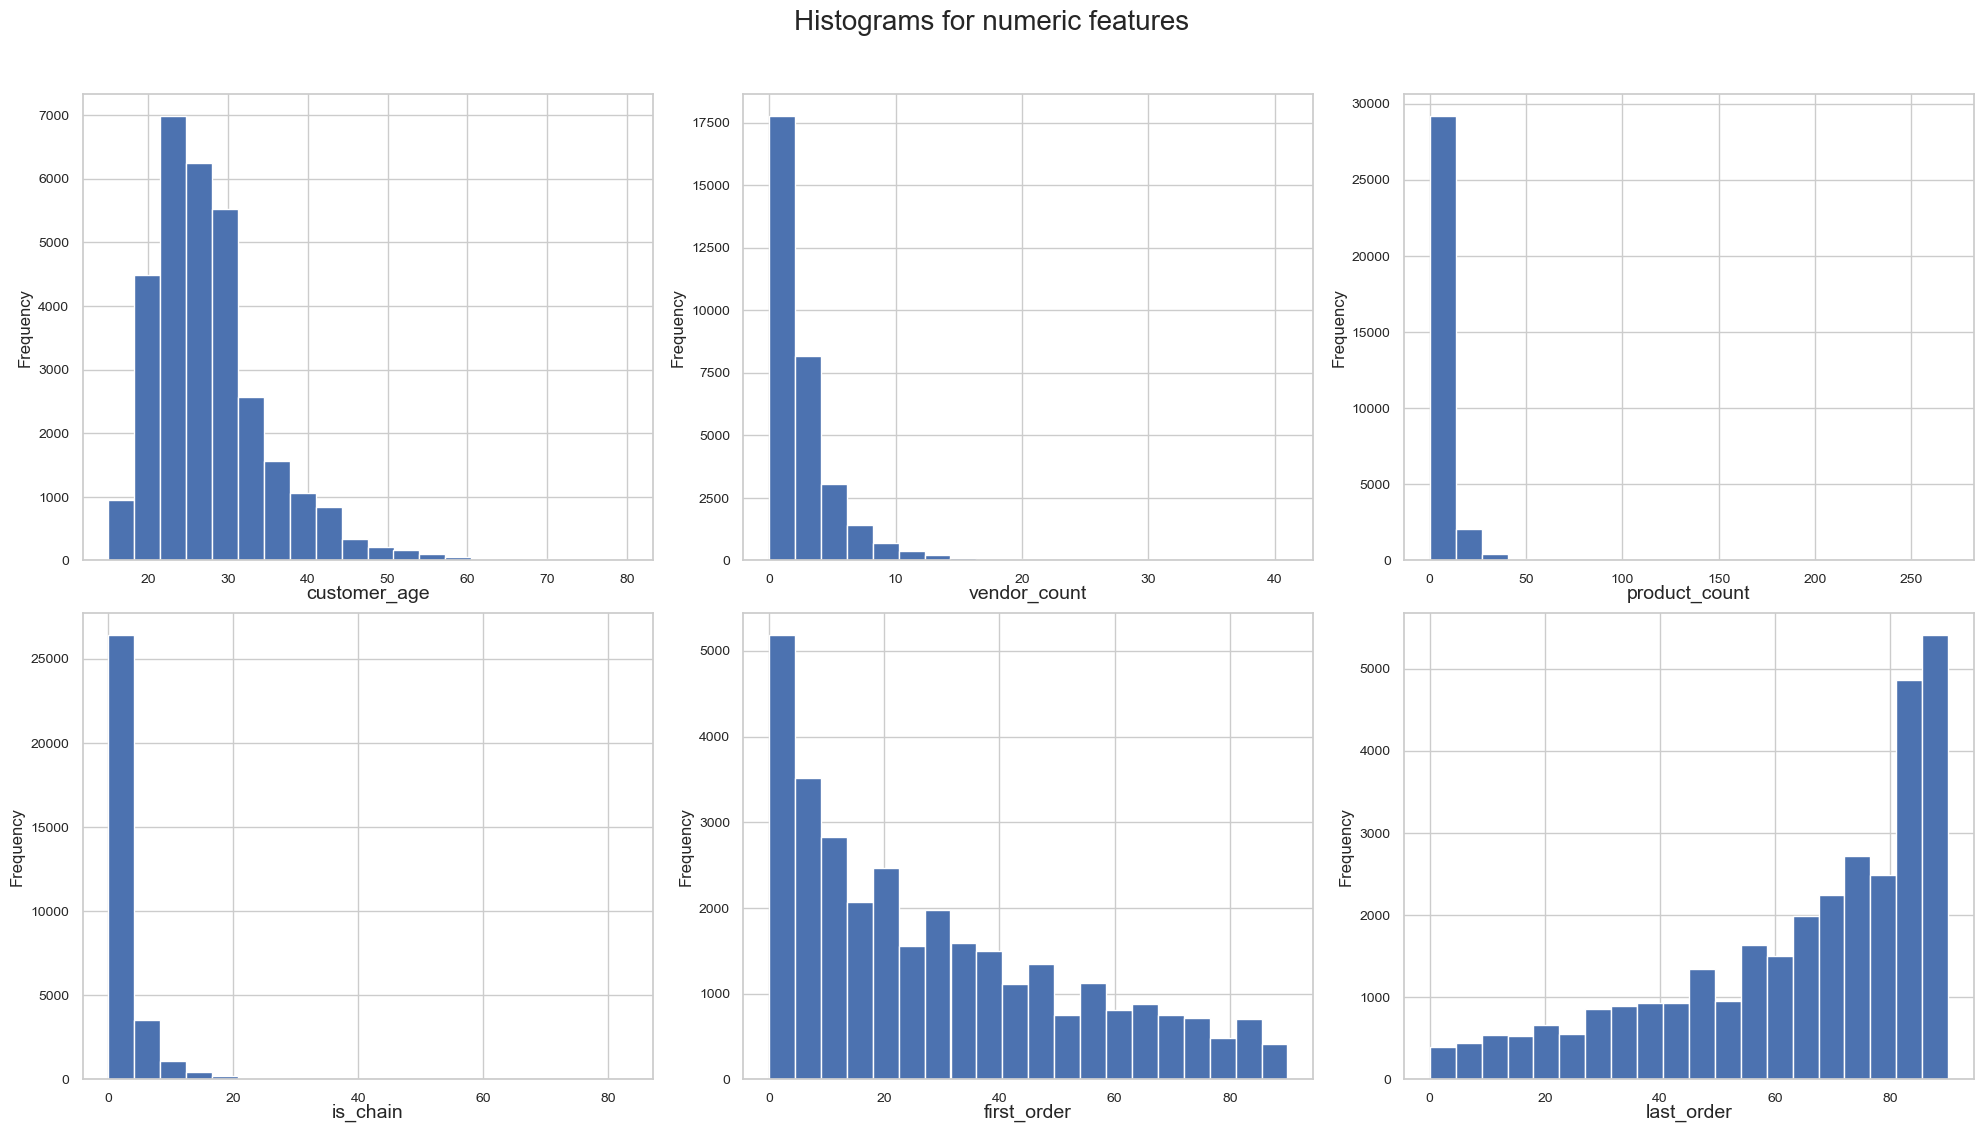

In [18]:
# Histogram for selected metric features

# Prepare figure and create individual axes
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features_plot):
    ax.hist(df[feat], bins=20)   # Select 20 bins
    ax.set_title(feat, fontsize=14, y=-0.1)  # Title for each histogram
    ax.set_ylabel('Frequency', fontsize=12)  # Y-axis label
    ax.tick_params(axis='both', which='major', labelsize=10)  # Tick size

# Title of the figure
plt.suptitle("Histograms for numeric features", fontsize=20, y=1.02)

# Show the plot
plt.show()

- vendor_count, product_count and is_chain: The histograms of this variables have values underrepresented because of the presence of significantly higher frequencies of zero in certain variables.

- customer_age: The histogram of this variable also has lower frequency values that are not shown in the plot, as we know the max value is 80. We believe this is related to the distribution itself.

- To address this issue, we will use logarithmic histograms to allow us to visualize all values, including the ones with small frequencies.

In [19]:
# Select metric variables with a high freqyency of zeros to plot logarithmic histograms and boxplots
metric_features_plot_log = ["customer_age", "vendor_count", "product_count", "is_chain"]

In [20]:
# Define subplot grid dimensions based on number of selected features for logarithmic plot
sp_rows_log = 2
sp_cols_log = ceil(len(metric_features_plot_log) / sp_rows)

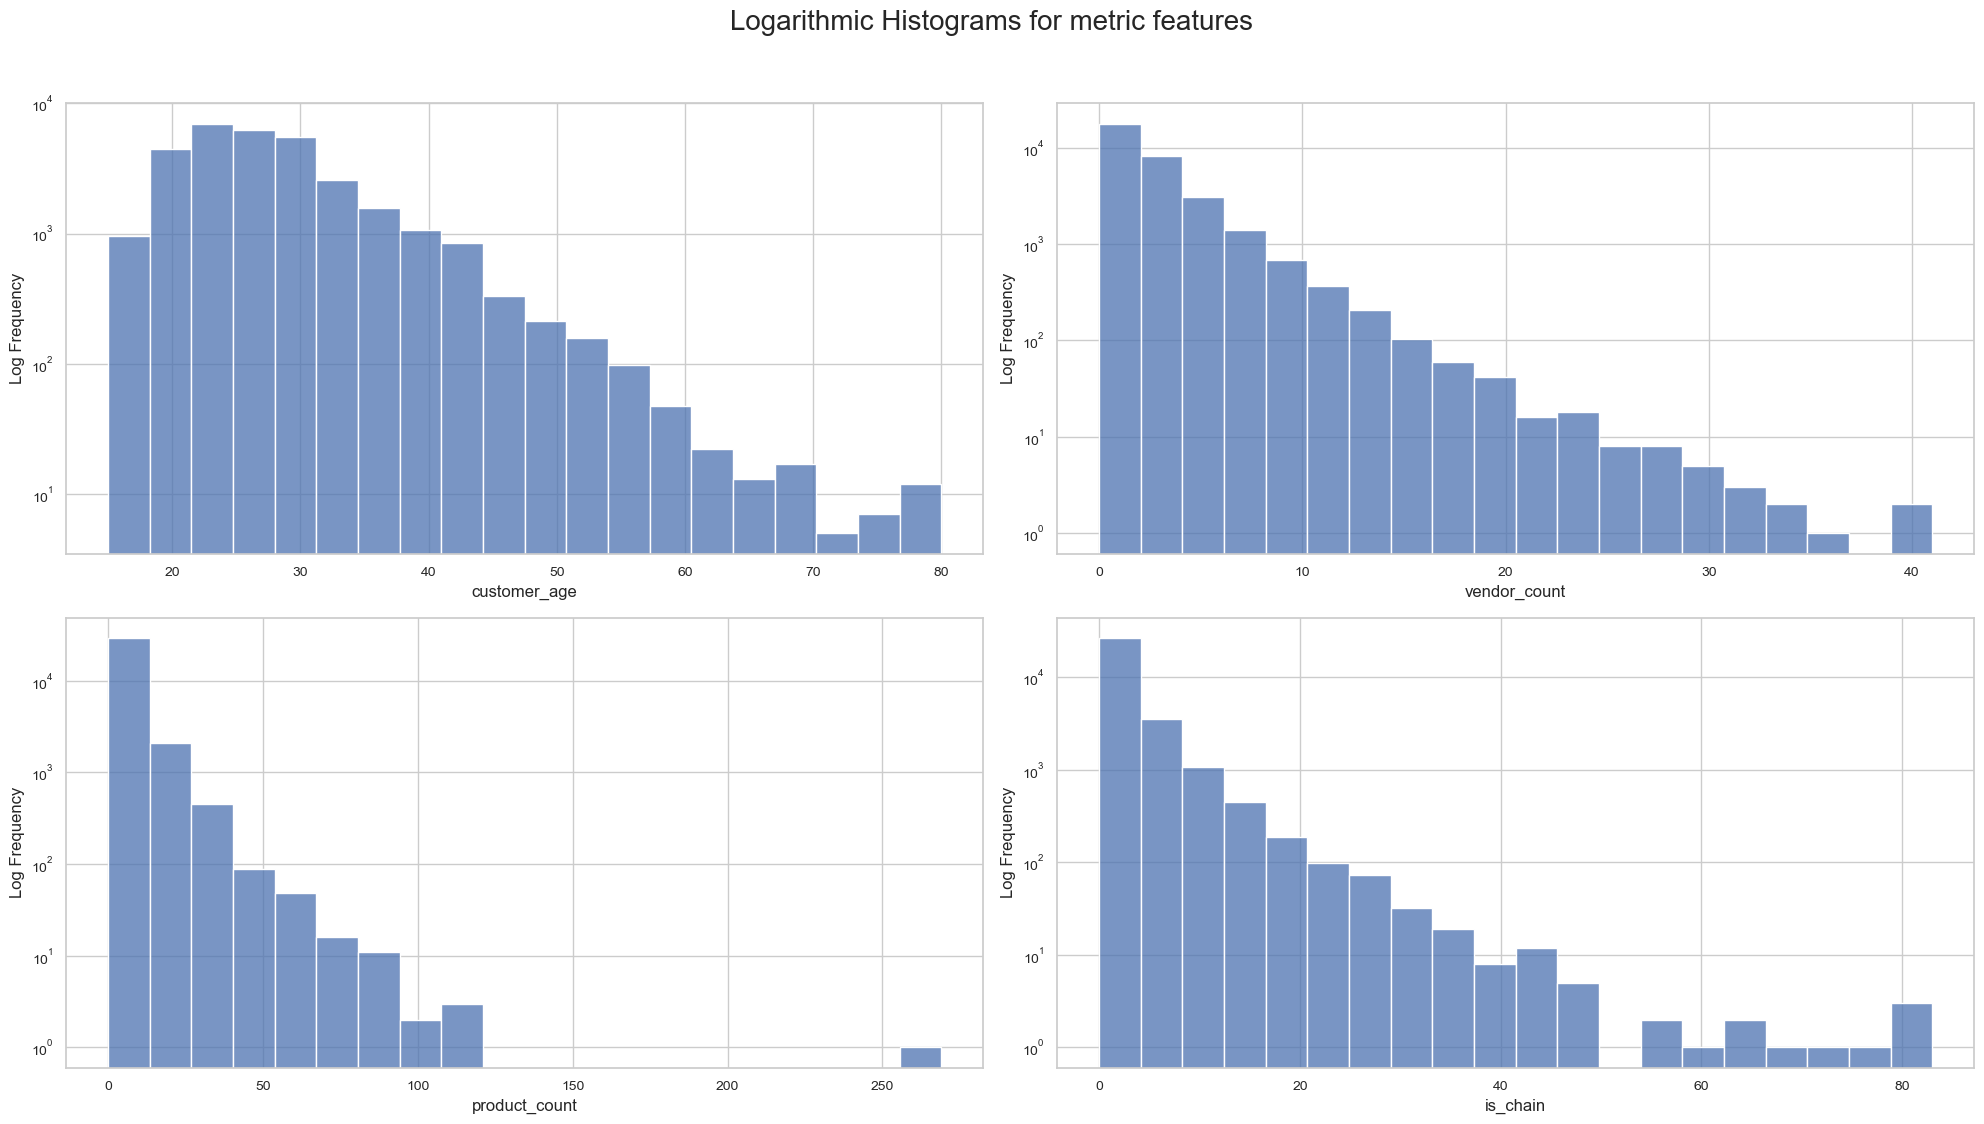

In [21]:
# Logarithmic Histograms for Metric Features

# Prepare figure and create individual axes
fig, axes = plt.subplots(sp_rows_log, sp_cols_log, figsize=(20, 11), tight_layout=True)

# Plot data with logarithmic transformation on the y-axis
for ax, feat in zip(axes.flatten(), metric_features_plot_log):
    # Plot histogram
    sns.histplot(x=df[feat], bins=20, ax=ax)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_ylabel('Log Frequency', fontsize=12)  # Y-axis label
    ax.tick_params(axis='both', which='major', labelsize=10)  # Tick size

# Title of the figure
plt.suptitle("Logarithmic Histograms for metric features", fontsize=20, y=1.02)

# Show the plot
plt.show()

**Analysis:**

- The plots are right skewed for all variables, except for last_order that is left skewed.

- **first_order** and **last_order**: as expected last_order has a higher frequency for high values while first_order has a higher frequency for low values. This is because first_order takes places earlier than last_order, so the number of days passed since the beggining of the data base will be lower for first_order and higher for last_order.

- **vendor_count** and **product_count**: both exhibit very high frequencies for zero, this was not expected, as we believed all customers had made at least one order. This variables should have a min values of 1, we will further analyze this.

- **is_chain**: in general the frequency decreases as the value increases. Meaning higher values are not common.

- **customer_age**: shows a frequency peak between 20-30 years old, and soon decreases towards higher ages.

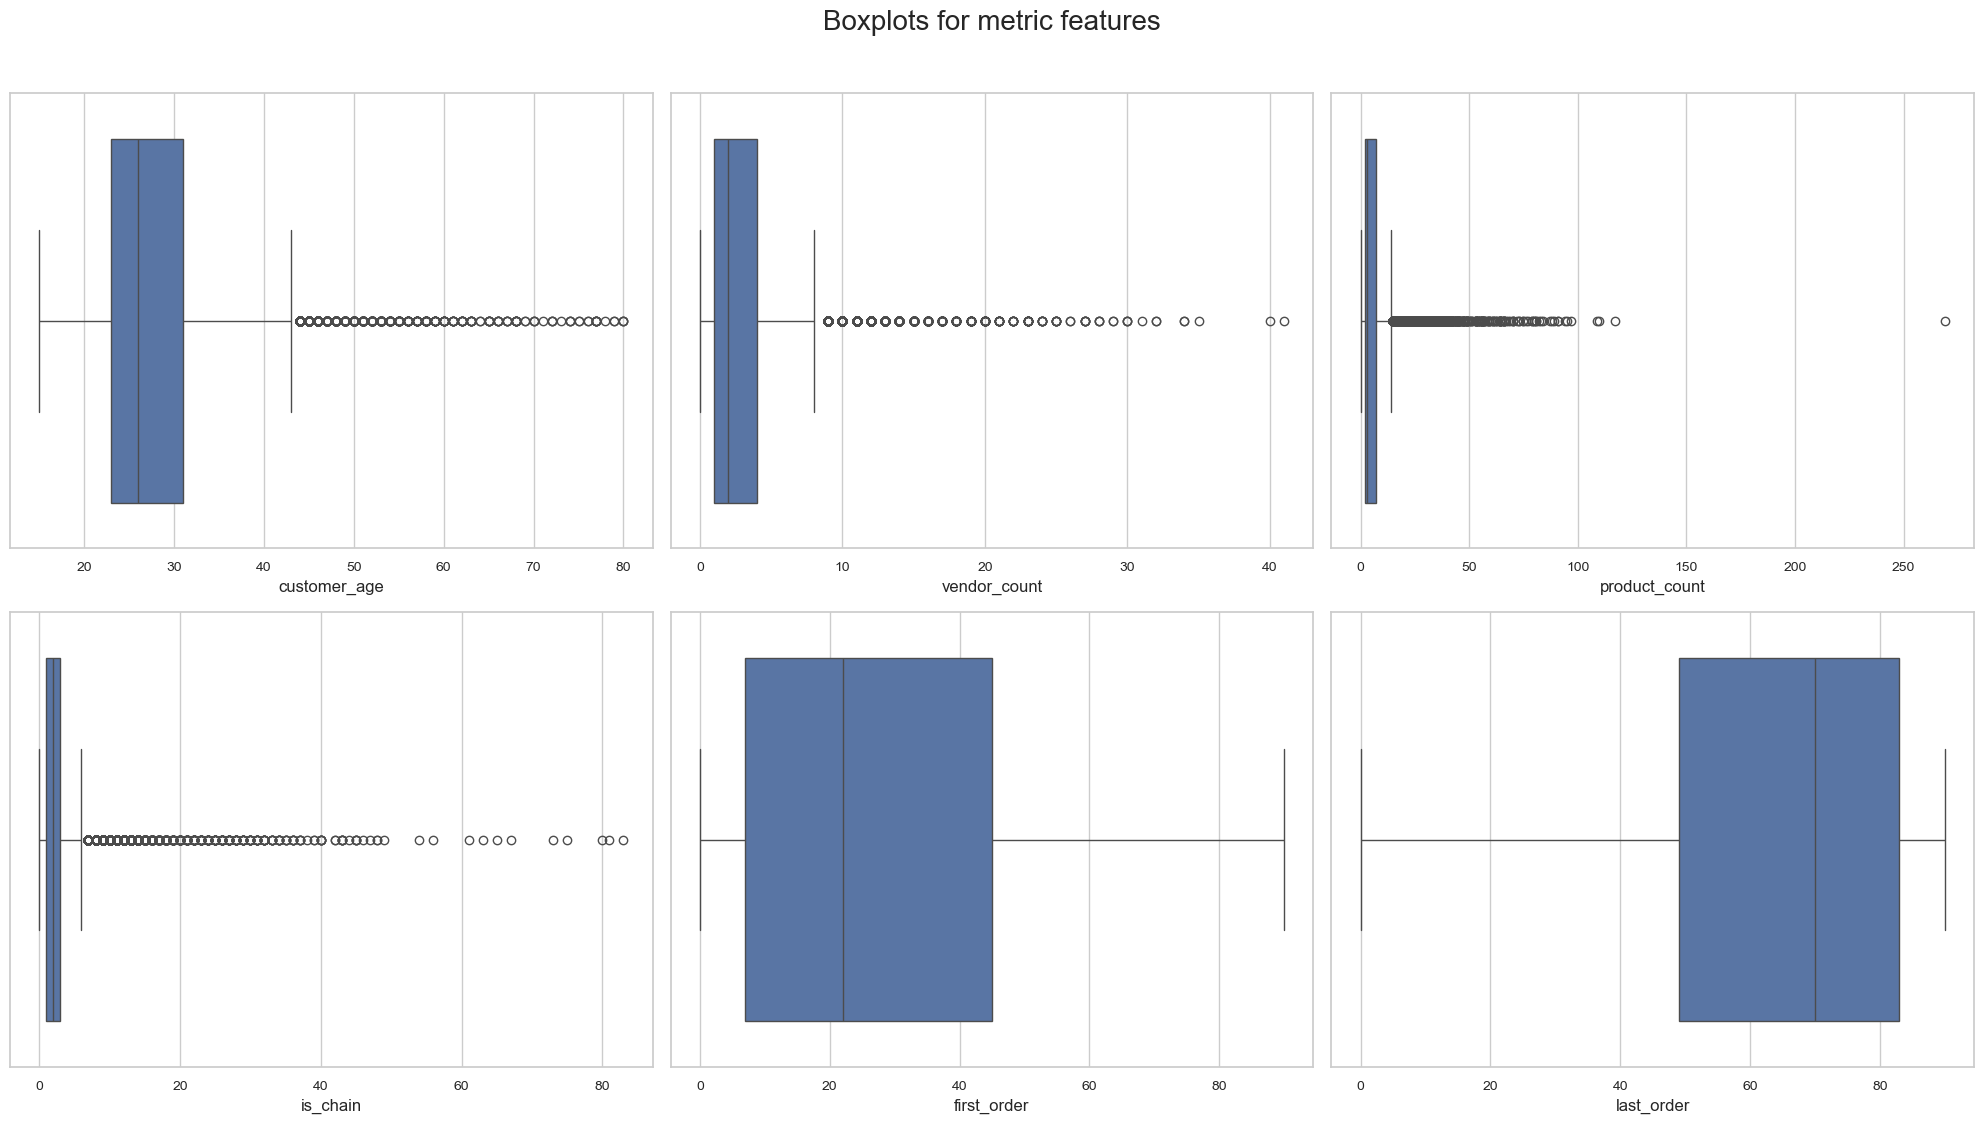

In [22]:
# Boxplots for selected metric features

# Prepare figure and create individual axes
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features_plot):
    sns.boxplot(x=df[feat], ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=10)  # Tick size

# Ttitle of the figure
plt.suptitle("Boxplots for metric features", fontsize=20, y=1.02)

# Show the plot
plt.show()

- In this case we will also apply a logarithmic transformation to help reduce the skewness, making it easier to visualize variability of the data for variables with a high frequency of zeros or very low frequency of higher values.

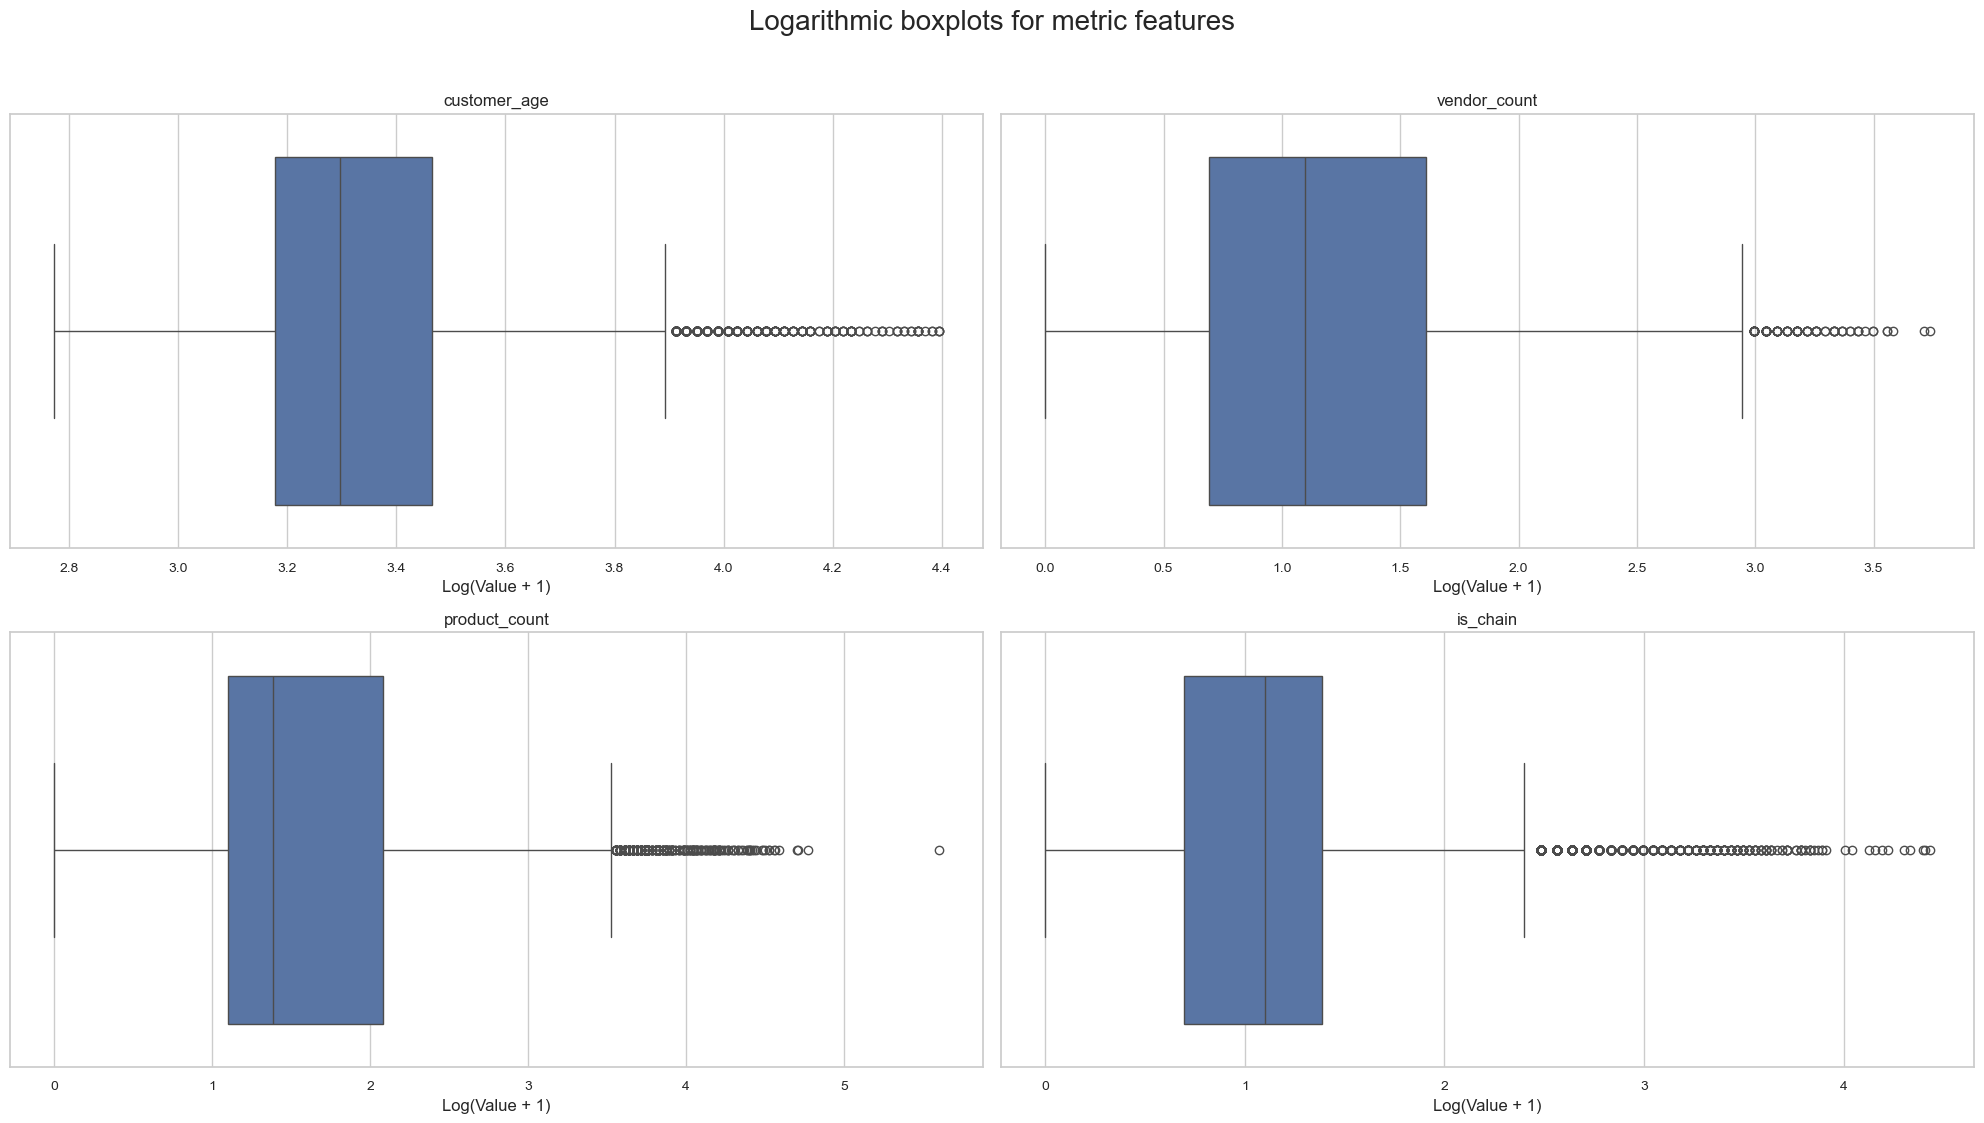

In [23]:
# Logarithmic Boxplots for selected metric features

# Prepare figure and create individual axes
fig, axes = plt.subplots(sp_rows_log, sp_cols_log, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features_plot_log):
    # Apply logarithm to the data, add 1 to avoid log(0)
    sns.boxplot(x=np.log1p(df[feat]), ax=ax)  # log transformation on x-axis
    ax.set_xlabel('Log(Value + 1)', fontsize=12)  # x-axis label for log-transformed values
    ax.tick_params(axis='both', which='major', labelsize=10)  # Tick size
    ax.set_title(feat)  # Set title for each subplot

# Title of the figure
plt.suptitle("Logarithmic boxplots for metric features", fontsize=20, y=1.02)

# Show the plot
plt.show()

**Analysis:**

- **customer_age**: The higher values for age we previously saw had a low frequency, are represented in the boxplot as outliers. We believe these values could represent true customers who fall outside the typical age range for most customers.

- **product_count**: This variable exhibits outliers at higher values, with a relative high number of instances classified as outliers. This suggests that most customers typically purchase smaller quantities of products. The outliers represent customers who buy significantly larger quantities than the majority.

- **vendor_count**: This variable also shows higher value outliers, indicating that most customers tend to order from the same vendors and don't have a diversified choice. The outliers reflect customers who buy from greater number of different vendors than is common within the customer base.

- **is_chain**: Higher values are considered outliers, even though they aren’t very large relative to the variable's range. If as we suspect, this variable represents the number of times a customer ordered from a chain restaurant, the outliers suggest that frequently ordering from chains is uncommon within the three-month period covered. In this case, the outliers represent customers that have a out of the norm behaviour in the number of times they order from a chain restaurant.

- **first_order**: It is relatively common for customers to have placed their first order either a long time ago or recently, which suggests that new customers continue to appear.

- **last_order**: It is unusual for the last order to have been placed a long time ago, indicating an outlier.This implies that most customers have made their last order recently, and those who have not ordered in a long time (possibly lost customers) are relatively uncommon.


<a class="anchor" id="cui">

### **3.1.2** *'CUI_(...)'* <br>

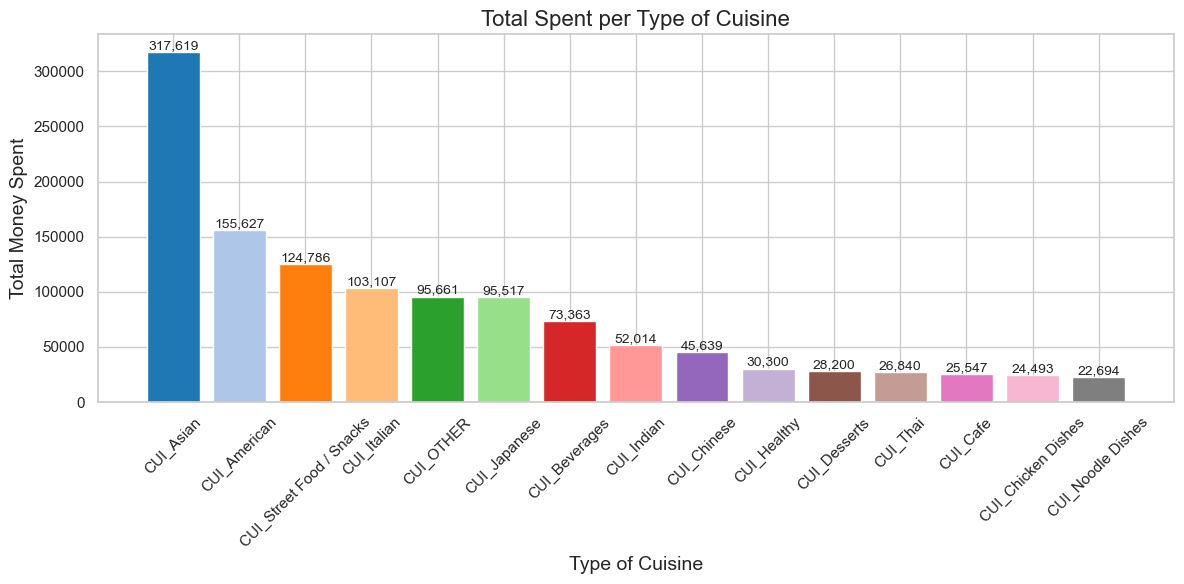

In [24]:
# Total spent per type of cuisine

# DataFrame with the cuisine spending data
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
cuisine_spending = df[cuisine_columns].sum()

# Sort the spending data in descending order
cuisine_spending = cuisine_spending.sort_values(ascending=False)

plt.figure(figsize=(12, 6))

for i in range(len(cuisine_spending)):
    plt.bar(cuisine_spending.index[i], cuisine_spending.values[i], color=palette[i])

# Adding value annotations on the bars
for i in range(len(cuisine_spending)):
    plt.text(i, cuisine_spending.values[i], f'{cuisine_spending.values[i]:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Total Spent per Type of Cuisine', fontsize=16)
plt.xlabel('Type of Cuisine', fontsize=14)
plt.ylabel('Total Money Spent', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated x-labels
plt.show()

**Analysis:**

- It's clear that the total spent is much higher for CUI_Asian in comparison to the rest of types of cuisine, this could be for 2 reasosn: customers buy more of this type of cuisine or the prices are much higher compared to the items in other types of cuisine.

- CUI_American comes next and has roughly only half of the total spent, reinforcing the contrasting difference between CUI_Asian and the rest. In this context, it seems more realistic that this is happening because of the pricey items.

- Some cuisines stand out for their lower expenditures: Noodle disses, chicken dishes, Thai, desserts and healthy.

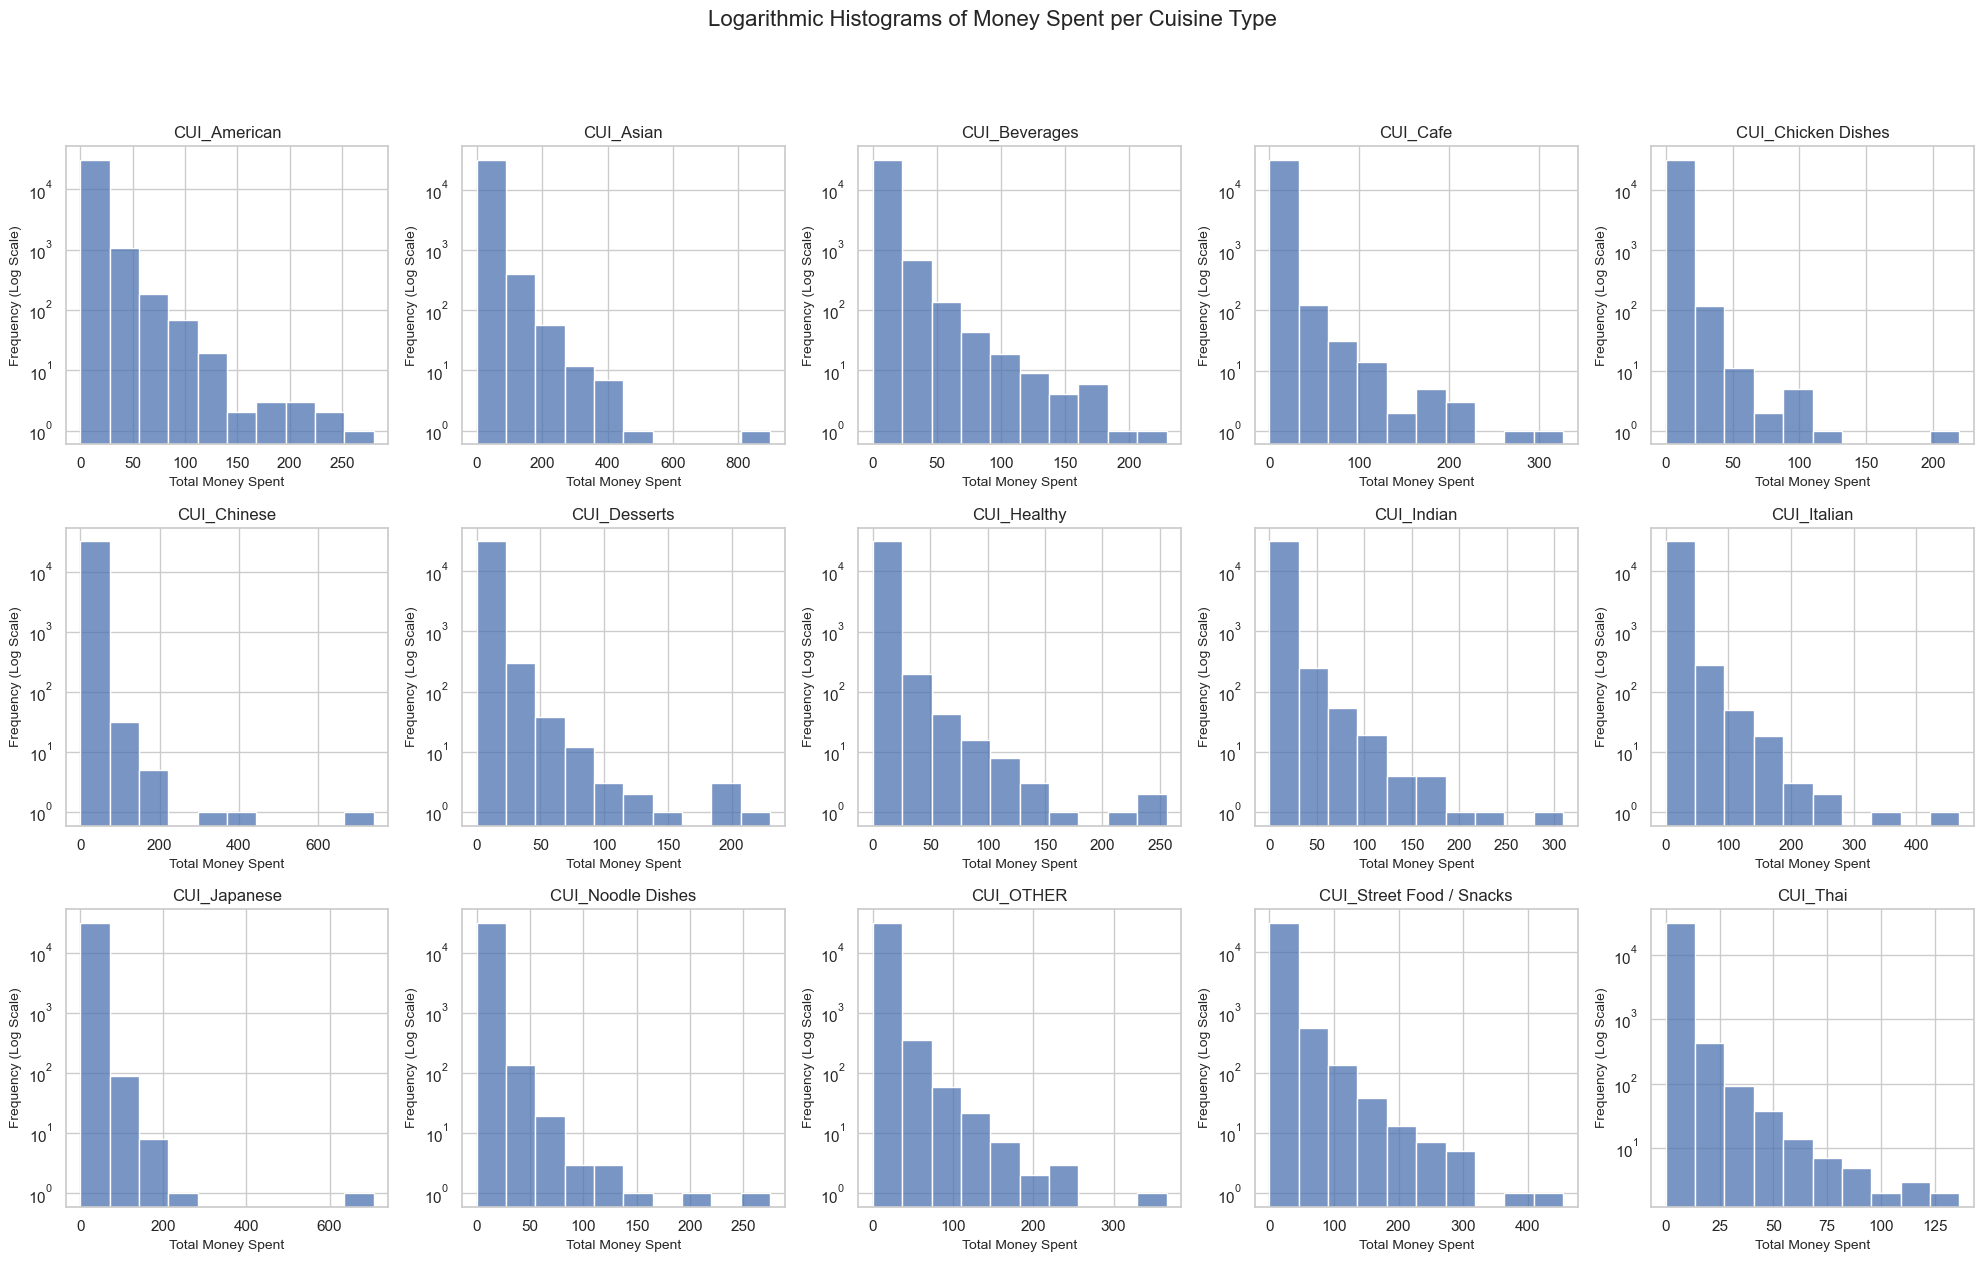

In [25]:
# Logarithmic Histograms of Money Spent by each customer per Cuisine Type

# Select columns that start with 'CUI_' for each cuisine type
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Set up subplots
sp_rows = 3
sp_cols = ceil(len(cuisine_columns) / sp_rows)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 12), tight_layout=True)

# Plot each cuisine type as a histogram with a logarithmic frequency scale
for ax, cuisine in zip(axes.flatten(), cuisine_columns):
    # Plot histogram with logarithmic scale on the y-axis
    sns.histplot(df[cuisine], bins=10, ax=ax, kde=False)
    ax.set_title(cuisine, fontsize=12)
    ax.set_xlabel('Total Money Spent', fontsize=10)
    ax.set_ylabel('Frequency (Log Scale)', fontsize=10)

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

# Title
plt.suptitle('Logarithmic Histograms of Money Spent per Cuisine Type', fontsize=16, y=1.05)

# Show plot
plt.show()

- In these plots, we used a logarithmic scale to ensure that all values are visible, given the significant differences in magnitude.

**Analysis:**

- We can see that all variables have a high frequency for the value of 0.

- This indicates that many customers have not spent any money on that particular type of cuisine. This is expected, because usually customers will not spend money across all types of cuisine, but will instead show preferences for certain types.

- Overall we can see that the frequency decreases for higher values, with all graphs being right-skwed. This suggests that customers tend to spread their spending across a selected range of cuisine types rather than concentrating their expenditures on just one.

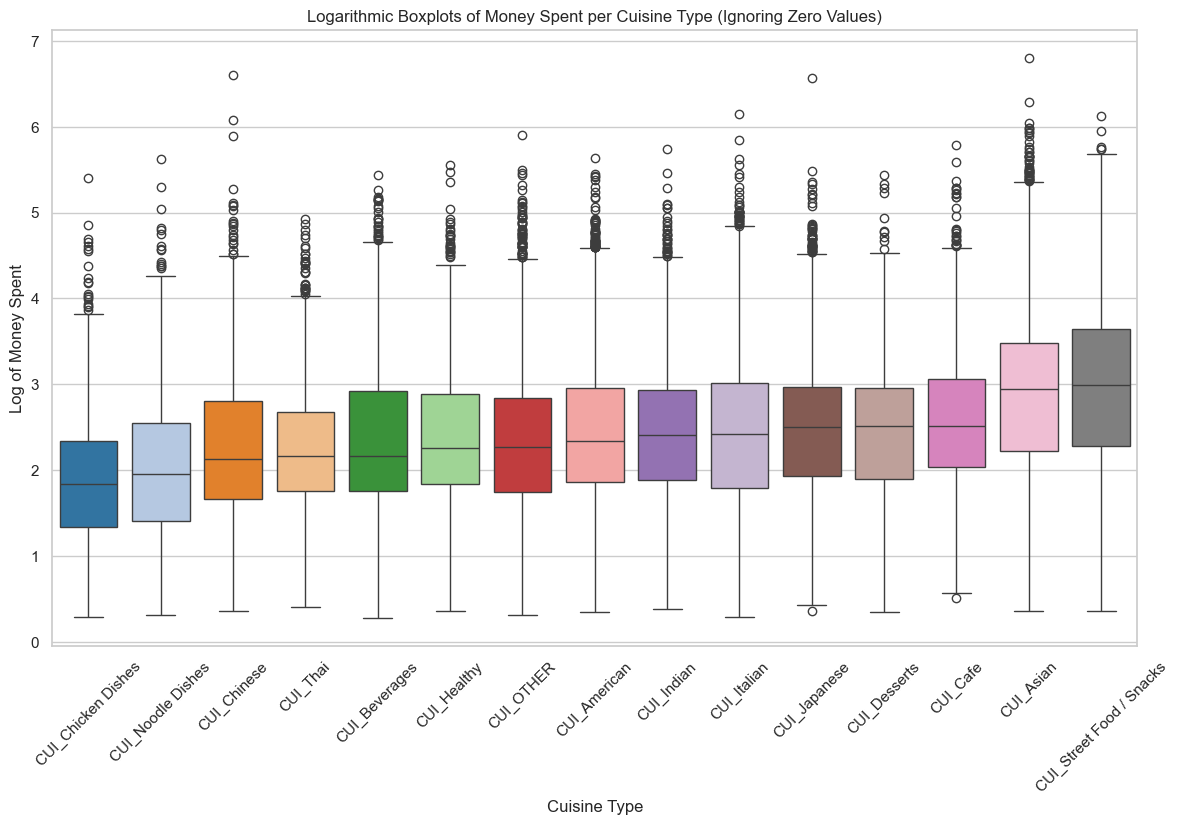

In [26]:
# Logarithmic Boxplots of Money Spent per Cuisine Type - Ignoring Zero Values

# Select cuisine columns (CUI) and replace zero values with NaN to ignore them
cui_vars = [col for col in df.columns if col.startswith('CUI_')]
filtered_cui_data = df[cui_vars].replace(0, np.nan)  # Replace zeros with NaN

# Apply logarithmic transformation given the high differences in magnitude
log_cui_data = np.log(filtered_cui_data + 1)

# Calculate medians for ordering
medians = log_cui_data.median().sort_values()

# Order for the boxplots according to medians
ordered_cuisines = medians.index

plt.figure(figsize=(14, 8))
sns.boxplot(data=log_cui_data[ordered_cuisines], palette=palette)
plt.title('Logarithmic Boxplots of Money Spent per Cuisine Type (Ignoring Zero Values)')
plt.xlabel('Cuisine Type')
plt.ylabel('Log of Money Spent')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

- Given the very high frequency of zeros, in order to further analyze the actual customer spending habits we plotted the boxplots ignoring the zero values, and using logarithmic values to deal with the high differences in magnitude.

**Conclusions**:
- For all types of cusine, we can see it's unsual to spend high amounts on a specific type of cuisine, which aligns with our previous conclusions. Customers who have this behaviour are classified as outliers.

- In the case of Janponese and Cafe it seems that it is also unsual to spend very low amounts for customers who buy in this types of cusine. When combined with values for the total spending per type of cuisine, this may indicate that customers tend to make multiple purchases or buy a larger quantity of products in these categories, which is even more likely for cafe items given the low expenditure.

- The types of cuisine that stand out with higher medians are street food/snacks and Asian. This may be due to higher prices, particularly for Asian cuisine given the very high expenditure. Or it could also indicate a tendency for customers to make more frequent purchases or buy larger quantities, especially for case of street food/snacks that does not have such a high expenditure.

- Chicken dishes and noodle dishes stand out for their lower medians. This could be related to either lower-priced products or a general tendency among customers not to purchase as much from these types of cuisine. This observation aligns with the fact that these cuisines also have the lowest overall expenditures.


<a class="anchor" id="hr">

### **3.1.3** *'HR_(...)'* <br>

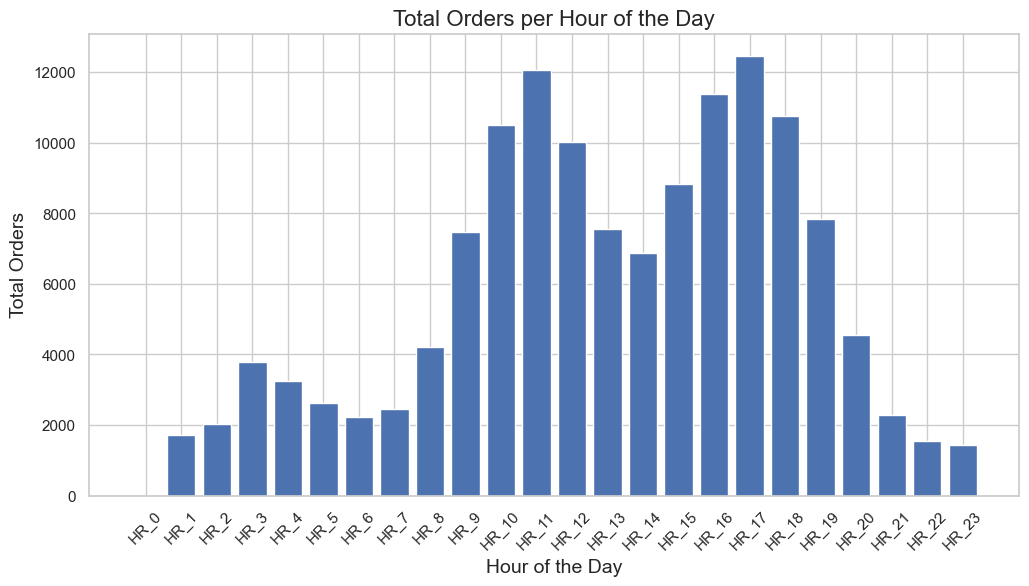

In [27]:
# Total orders by hours of the day

# Create a DataFrame with the orders by hour
hour_columns = [f'HR_{i}' for i in range(24) if f'HR_{i}' in df.columns]
hour_orders = df[hour_columns].sum()

plt.figure(figsize=(12, 6))

# Plot each bar using the sorted hour_orders
plt.bar(hour_orders.index, hour_orders.values)

plt.title('Total Orders per Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

**Analysis:**

- For this variables there seems to be pattern between numbees of orders and meal times.

- We can see a peak in the amount of orders when it becomes close to luch time and also for dinner time.

- Night hours have notoriously less orders, with a not so pronunced peak at 3am.

- This suggests that clients primarily order during traditional meal times (lunch, dinner), indicating a preference for ordering at these times, while late-night orders are less common.

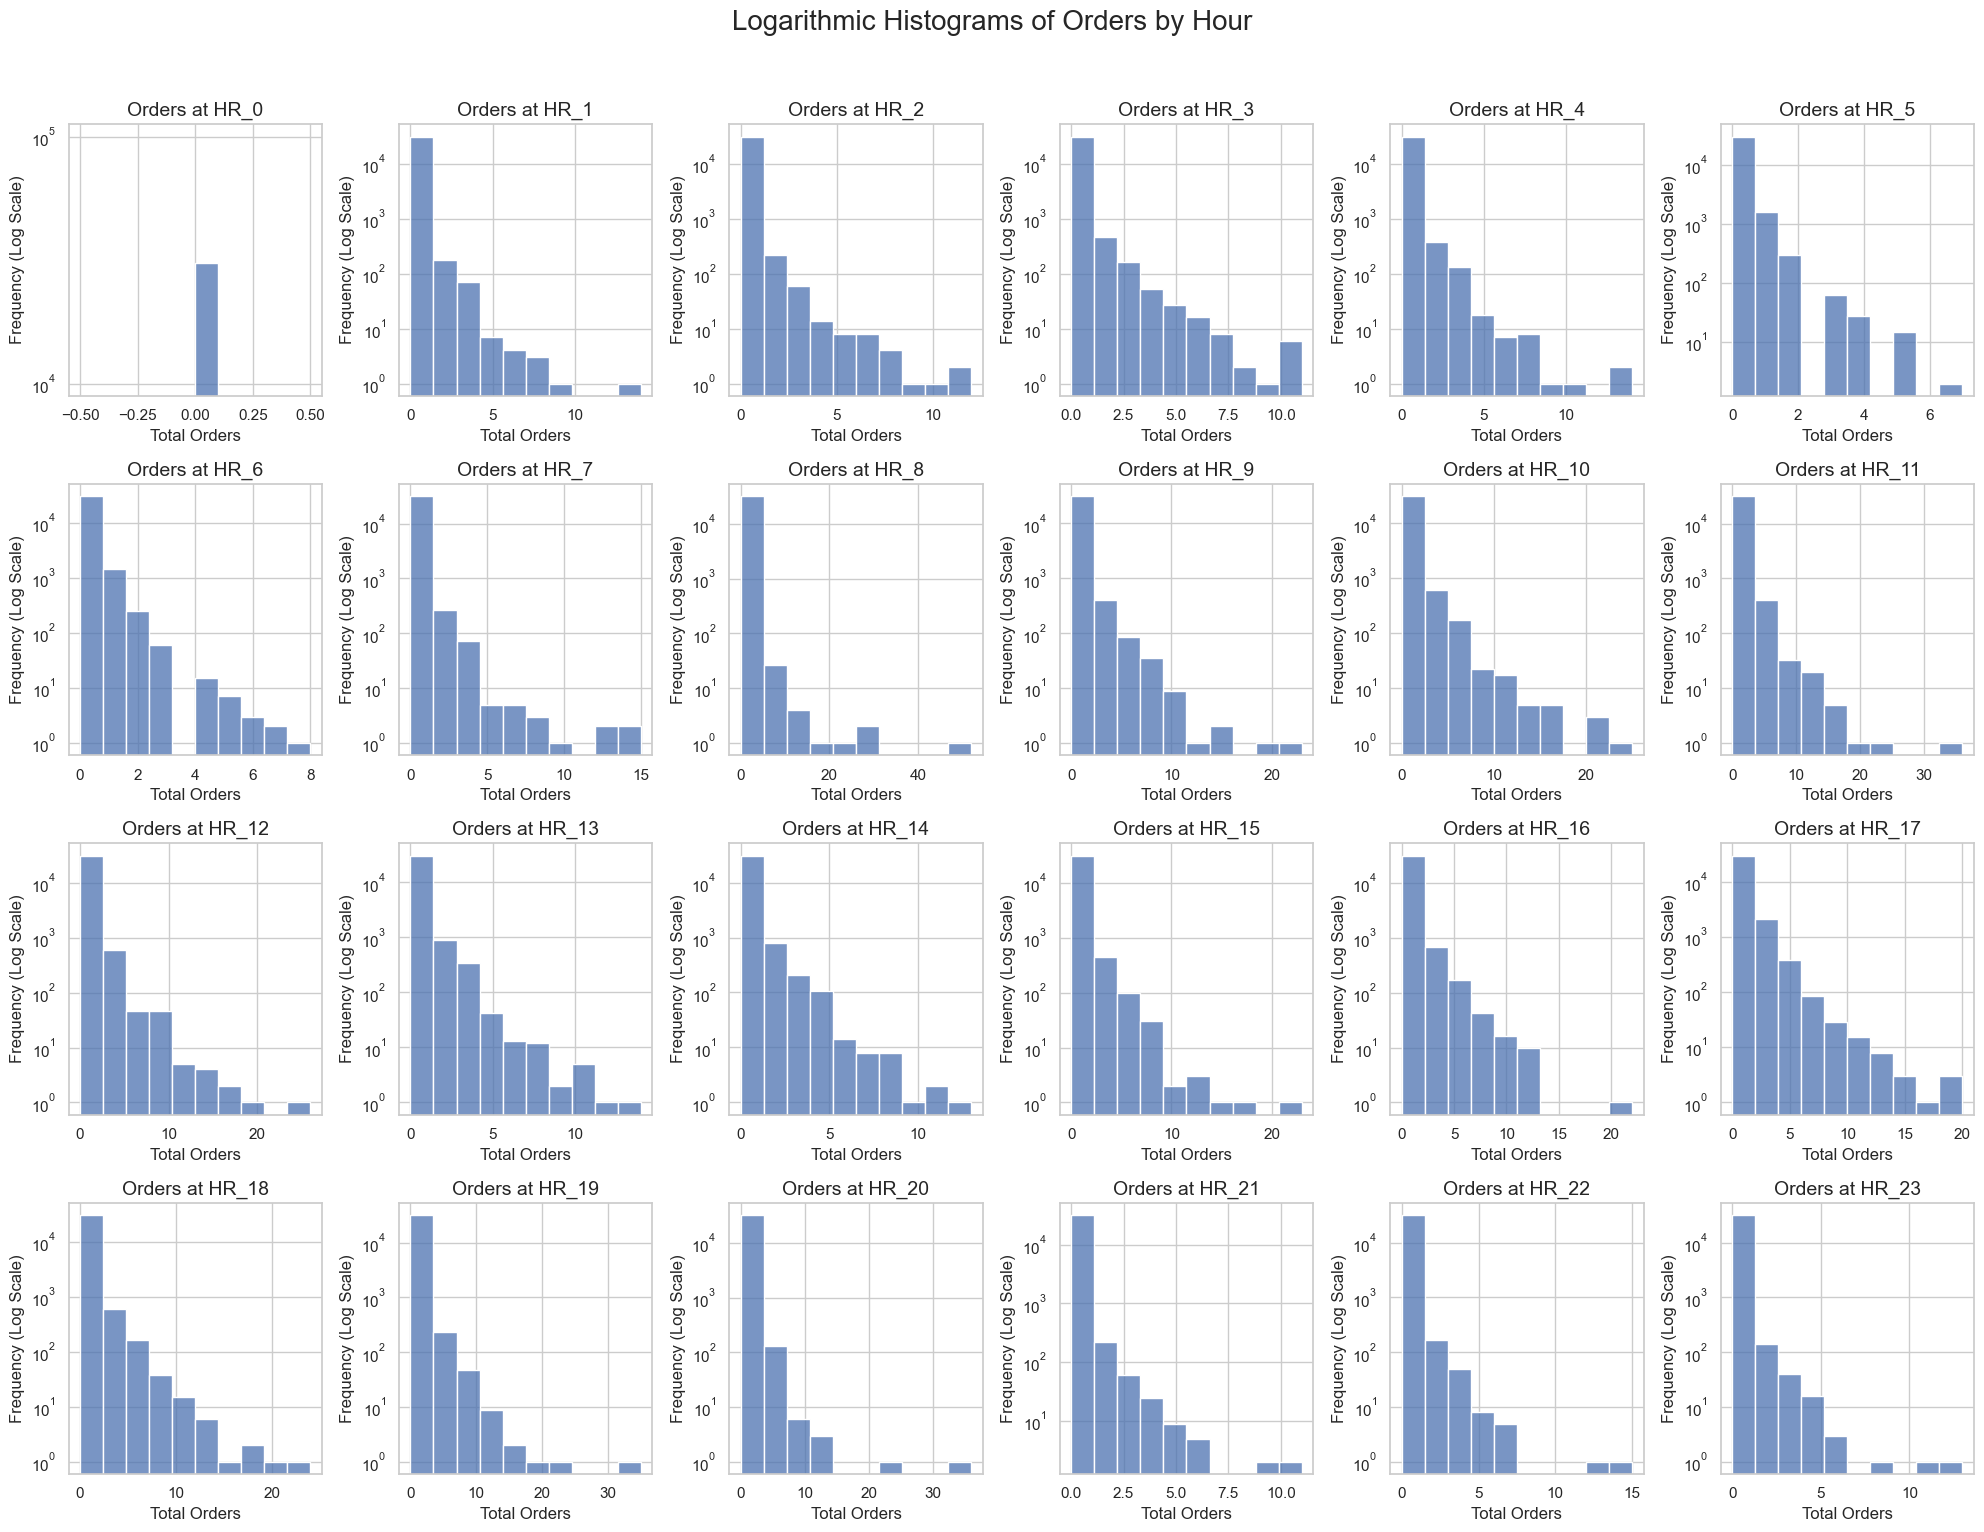

In [28]:
# Logarithmic histograms of orders by hours

# DataFrame with the orders per hour
hour_columns = [col for col in df.columns if col.startswith('HR_')]

# Setting up the number of subplots
sp_rows = 4  # Number of rows for the plots
sp_cols = ceil(len(hour_columns) / sp_rows)  # Number of columns based on number of hours

# Prepare figure and create individual axes
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 15), tight_layout=True)

# Plotting each hour's orders as a histogram with logarithmic frequency
for ax, hour in zip(axes.flatten(), hour_columns):
    # Plot the histogram
    sns.histplot(df[hour], bins=10, ax=ax, kde=False)
    ax.set_title(f'Orders at {hour}', fontsize=14)
    ax.set_xlabel('Total Orders', fontsize=12)
    ax.set_ylabel('Frequency (Log Scale)', fontsize=12)

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

# Remove empty subplots if any
for i in range(len(hour_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Show the plot
plt.suptitle('Logarithmic Histograms of Orders by Hour', fontsize=20, y=1.02)
plt.show()

- In these plots, we used a logarithmic scale to ensure that all values are visible, given the significant differences in magnitude.

**Analysis:**

**HR_0**:

- HR_O only shows 0 values. This may not express the actual ordering habits, we need to further analyze missing values for this variable.

**Other Hours**:

- We can see that all variables have a high frequency for the value of 0.

- This indicates that many customers have not spent any money on that particular hour. This is expected, as customers typically do not make purchases at all hours but rather favor specific meal times.

- Overall we can see that the frequency decreases for higher values, with all graphs being right-skwed. This suggests that customers tend to spread their orders across a selected range of hours rather than concentrating their orders on just one specific hour.

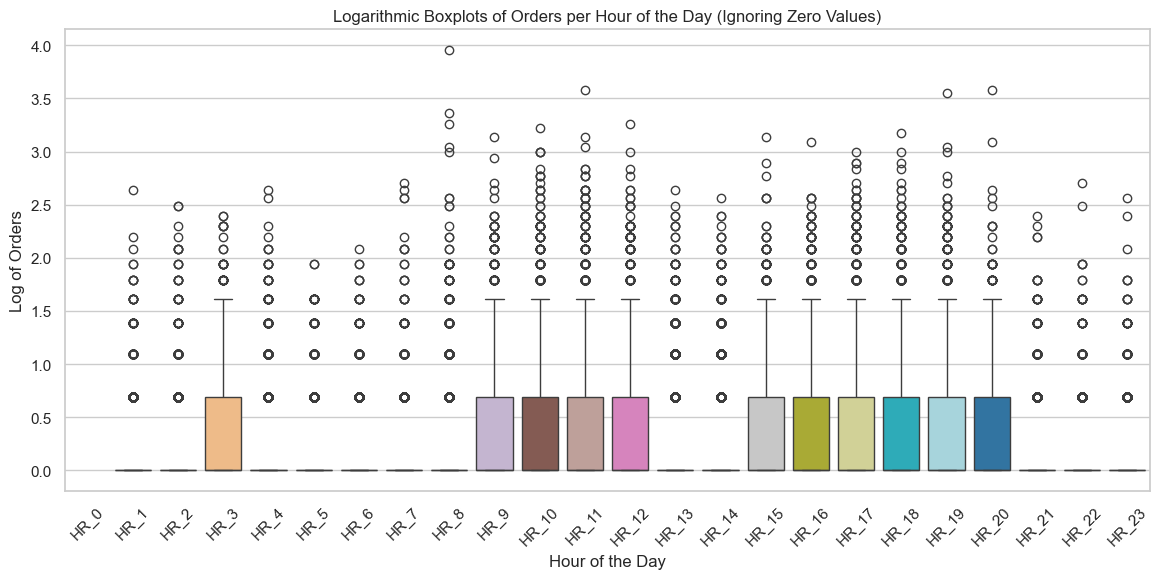

In [29]:
# Logarithmic Boxplots of Orders per Hour of the Day (Ignoring Zero Values)

# Hours of the Day (HR) Columns
hr_vars = [col for col in df.columns if col.startswith('HR_')]
filtered_hr_data = df[hr_vars].replace(0, np.nan)  # Replace 0s with NaN
log_hr_data = np.log(filtered_hr_data)  # Apply logarithmic transformation

plt.figure(figsize=(14, 6))
sns.boxplot(data=log_hr_data, palette=palette)
plt.title('Logarithmic Boxplots of Orders per Hour of the Day (Ignoring Zero Values)')
plt.xlabel('Hour of the Day')
plt.ylabel('Log of Orders')
plt.xticks(rotation=45)
plt.show()

- Given the very high frequency of zeros, in order to further analyze the actual customer spending habits we plotted the boxplots ignoring the zero values, and using logarithmic values to deal with the high differences in magnitude.

- HR_O will be excluded from the analysis as there seems to be some abnormality with the values.

**Analysis**:
- For all hours we can see that the median aligns with the ordering habits we saw in the plot with the total orders per hours.

- Higher values are normal in the morning and close to lunch, as well as in the afternoon and around dinner time. However, extremely high values are classified as outliers, suggesting that customers do not consistently order at the same hours but rather across a range of hours.

- For some reason this also happens at 3am, which also exhibited a higher total orders than other hours across the night. Possibly related to social events or shift workers.

- Any relatively high value during other hours is considered an outlier, which indicates it is not common to order at this times among customers.

<a class="anchor" id="dow">

### **3.1.4** *'DOW_(...)'* <br>

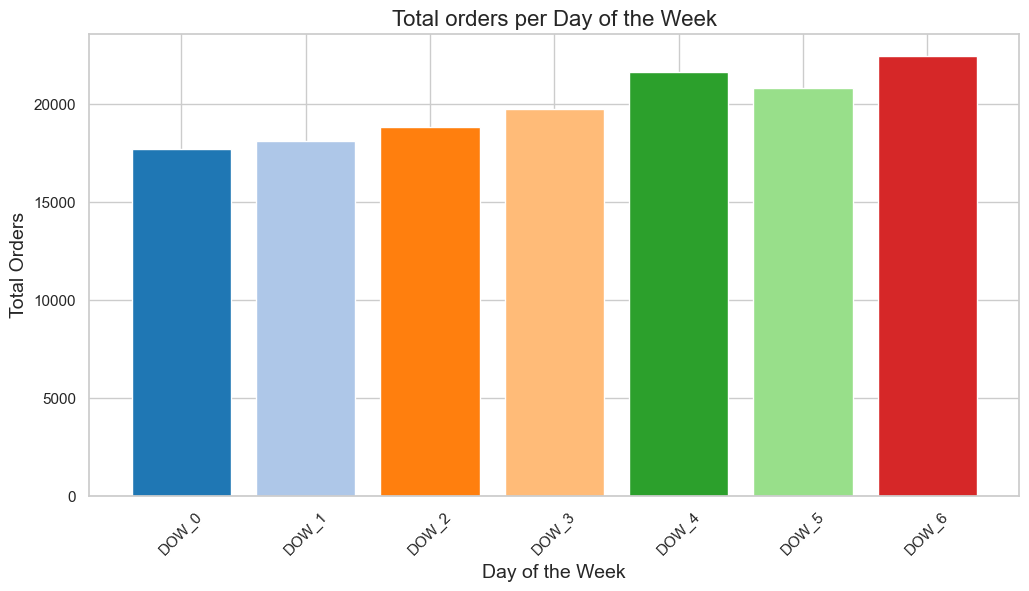

In [30]:
# Total orders by day of the week

# DataFrame with the orders by day of the week
dow_columns = [col for col in df.columns if col.startswith('DOW_')]
dow_orders = df[dow_columns].sum()

# Sort the order by day of the week
dow_orders = dow_orders.sort_index()


plt.figure(figsize=(12, 6))

# Plot each bar with a corresponding color from the gradient
for i in range(len(dow_orders)):
    plt.bar(dow_orders.index[i], dow_orders.values[i], color=palette[i])

plt.title('Total orders per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

**Analysis:**

- The bar plot indicates minimal variance in the number of orders across the different weekdays, although some differences are still evident.

- The bar plot indicates that customers order more on thursday (DOW_4), friday (DOW_5) and saturday (DOW_6).

- Sunday (DOW_0) is the day with the fewest orders, with a gradual increase in orders throughout the week leading up to the peak on Saturday.

- Interestingly, Thursday outpaces Friday in the number of orders.

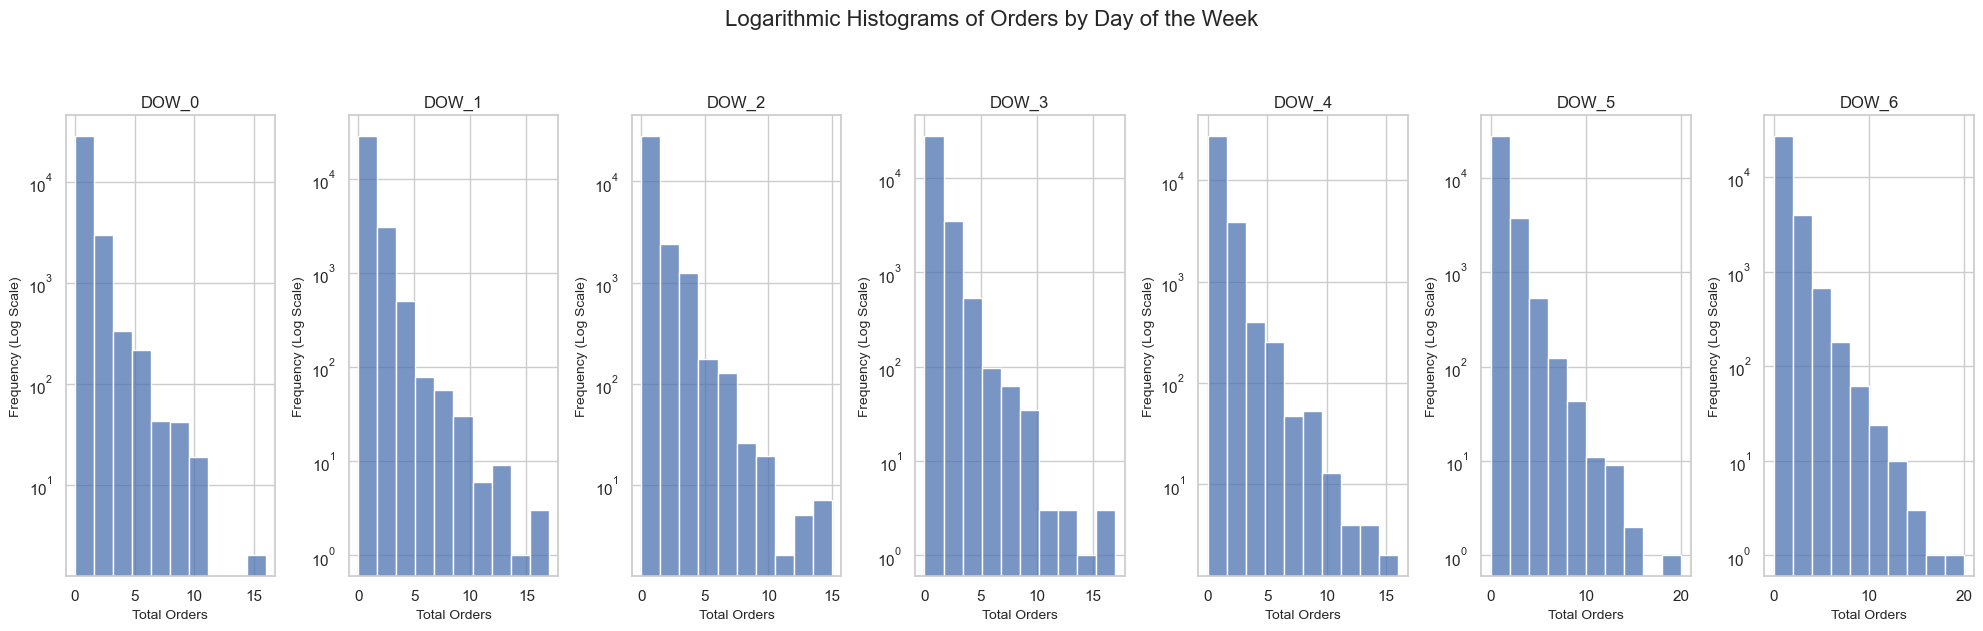

In [31]:
# Logarithmic histograms of orders by day of the week

# List of columns for each day of the week
dow_columns = [col for col in df.columns if col.startswith('DOW_')]

# Set up subplots
fig, axes = plt.subplots(1, len(dow_columns), figsize=(20, 6), tight_layout=True)

# Plot each day of the week as a histogram with a logarithmic frequency scale
for ax, day in zip(axes, dow_columns):
    # Plot histogram
    sns.histplot(df[day], bins=10, ax=ax, kde=False)
    ax.set_title(day, fontsize=12)
    ax.set_xlabel('Total Orders', fontsize=10)
    ax.set_ylabel('Frequency (Log Scale)', fontsize=10)

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

# Show the plot with a common title
plt.suptitle('Logarithmic Histograms of Orders by Day of the Week', fontsize=16, y=1.05)
plt.show()

- In these plots, we used a logarithmic scale to ensure that all values are visible, given the significant differences in magnitude, especially because of high frequencies for 0.

**Analysis:**

- We can see that all variables have a high frequency for the value of 0.

- This indicates that many customers have not spent any money on that particular day. This is expected, as customers typically do not make purchases in all days, but rather favor specific days for ordering.

- Overall we can see that the frequency decreases for higher values, with all graphs being right-skwed. This suggests that customers tend to spread their orders across a selected range of days rather than concentrating their orders on just one specific day.

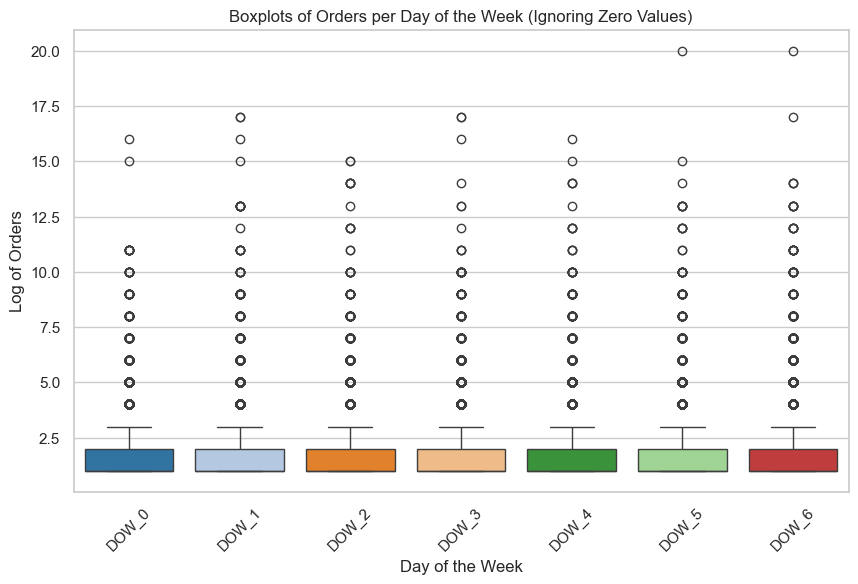

In [32]:
# Boxplots of Orders per Day of the Week (Ignoring Zero Values)

# Day of the Week (DOW) Columns
dow_vars = [col for col in df.columns if col.startswith('DOW_')]
filtered_dow_data = df[dow_vars].replace(0, np.nan)  # Replace 0s with NaN

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_dow_data, palette=palette)
plt.title('Boxplots of Orders per Day of the Week (Ignoring Zero Values)')
plt.xlabel('Day of the Week')
plt.ylabel('Log of Orders')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

**Analysis:**

- All days of the week display similar boxplots, which may be related to the relatively consistent total orders across weekdays, despite some variations.

- Customers who place a lot of orders on specific days are classified as outliers.

- The presence of higher value outliers on Friday and Saturday suggests that while it is uncommon, some customers do tend to make most of their orders on these particular days.

<a class="anchor" id="categoticalvariablesuni">

## **3.2. Categorical Variables' Univariate Analysis**

<a class="anchor" id="customerregion">

### **3.2.1** *'customer_region'*
   

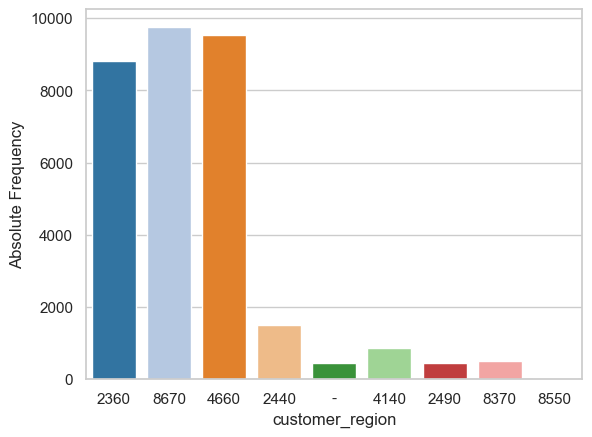

In [33]:
sns.countplot(x=df["customer_region"], palette=palette)

plt.ylabel("Absolute Frequency")
plt.show()

**Analysis:**
- The regions most present in this dataset are: '8670', '4660' and '2360', respectively with over 8000 customers;

- Several regions (2440, 4140, 8370, 2490, 8550) have significantly lower counts, indicating fewer customers in these areas;

- There is a bar labelled "-" with a lower count, which may indicate missing or unknown region data;

- The distribution is heavily imbalanced, with certain regions dominating in terms of customer count. This could affect analyses that assume uniform distribution across regions, we may need to re scale to see the absolute frequency of the region '8550'.

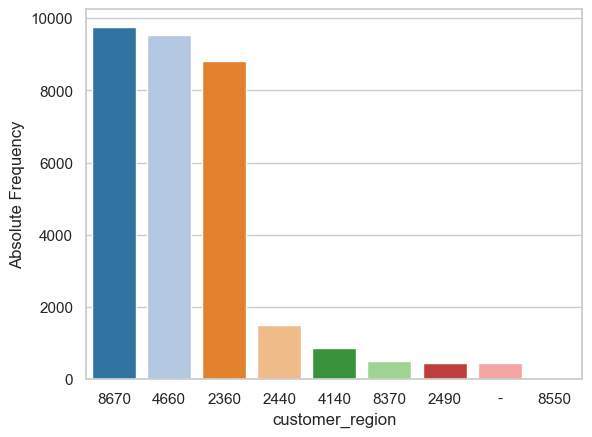

In [34]:
sns.countplot(x=df["customer_region"],
              order= df['customer_region'].value_counts(ascending=False).index,
              palette=palette
              )

plt.ylabel("Absolute Frequency")
plt.show()

 - The plot for absolute frequencies indicates that there are no observations for the region '8550'. Is that true?


In [35]:
len(df[df['customer_region'] == '8550'])

26

- Given we have some observations for the '8550' region, we used a logarithmic scale to ensure that all values are visible, given the significant differences in magnitude.

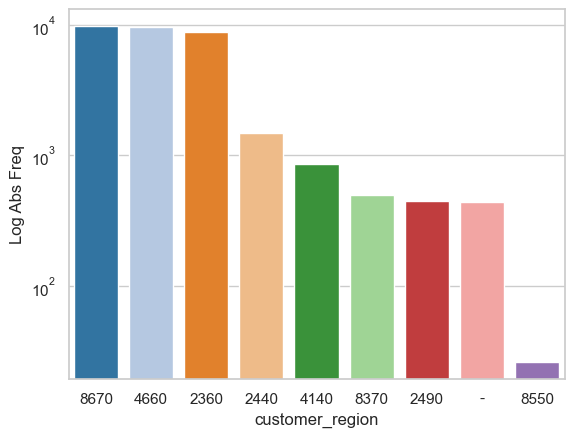

In [36]:
# So let's try to change the scale of the y axis:
sns.countplot(x=df["customer_region"],
              order= df['customer_region'].value_counts(ascending=False).index,
              palette=palette
              )

plt.yscale("log")
plt.ylabel("Log Abs Freq")
plt.show()

<a class="anchor" id="lastpromo">

### **3.2.2** *'last_promo'*

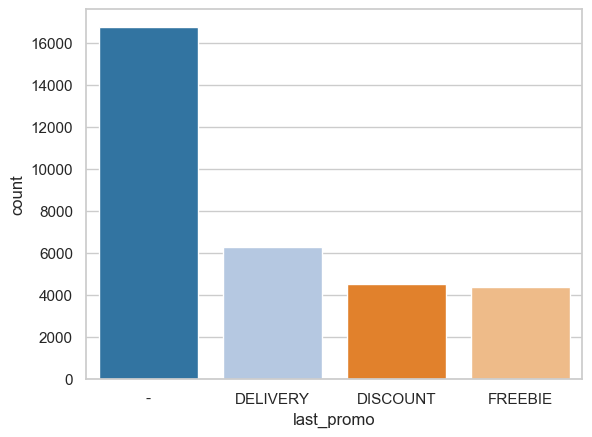

In [37]:
sns.countplot(x=df["last_promo"],
              order = df['last_promo'].value_counts(ascending=False).index,
              palette=palette

)

plt.show()

**Analysis:**
- It is clear that the category with the highest Absolute Frenquency (exceeds 16000 times) is '-'. In our understanding, we consider that as 'No promotion used', so we have to rename it!

- Inside the named promotions, the 'Delivery' category is the most used, and it may mean that the promotion offered to the customers was a free or discounted delivery, with a bit more than 6000 times used;

- The following type of promotion is "Discount", that maybe is a promotion on the food items;

- Finally, the plot shows "Freebie" with a count of around 4000 uses.

- Most customers do not apply any promotion code at all. While there is some preference for the 'DELIVERY' discount code, the count is not significantly higher, indicating that customers tend to apply a variety of discount codes.

<a class="anchor" id="paymentmethod">

### **3.2.3** *'payment_method'*

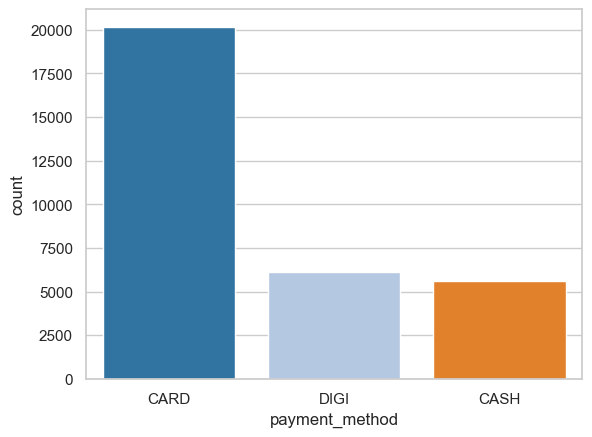

In [38]:
sns.countplot(x=df["payment_method"],
              order = df['payment_method'].value_counts(ascending=False).index,
              palette=palette
)

plt.show()

**Analysis:**

- 'CARD' is the most frequently used payment method, with nearly 20,000 counts, significantly higher than the other two methods;

- Customers show a notorious preference for paying with card;

- Both 'DIGI' (in our understanding could possibly be digital payment) and "CASH", have lower but relatively similar counts, suggesting a balanced preference between these two methods.

<a class="anchor" id="numericbivariate">

## **3.3. Numerical Variables' Bivariate Analysis**

<a class="anchor" id="customerageperproductcount">

### **3.3.1** *'customer_age'*  vs.  *'product_count'*

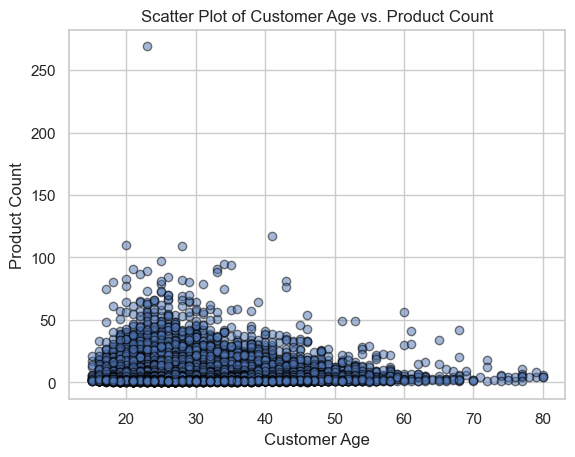

In [39]:
plt.scatter(df["customer_age"], df["product_count"],
            edgecolors="black",    # Draw the edges of each point
            alpha=0.5,             # Set the opacity level of each point
           )

plt.xlabel("Customer Age")
plt.ylabel("Product Count")
plt.title("Scatter Plot of Customer Age vs. Product Count")
plt.show()

**Analysis:**
- It is evident that people who have a higher product count are usually between 20 and 30 years old.

- From 40 years old and up the product count tend to decrease.

- Younger customers appear to order a bigger quantity of products compared to their older individuals.

<a class="anchor" id="customeragepercuisine">

### **3.3.2** *'customer_age'*  vs.  *'CUI_(...)'*

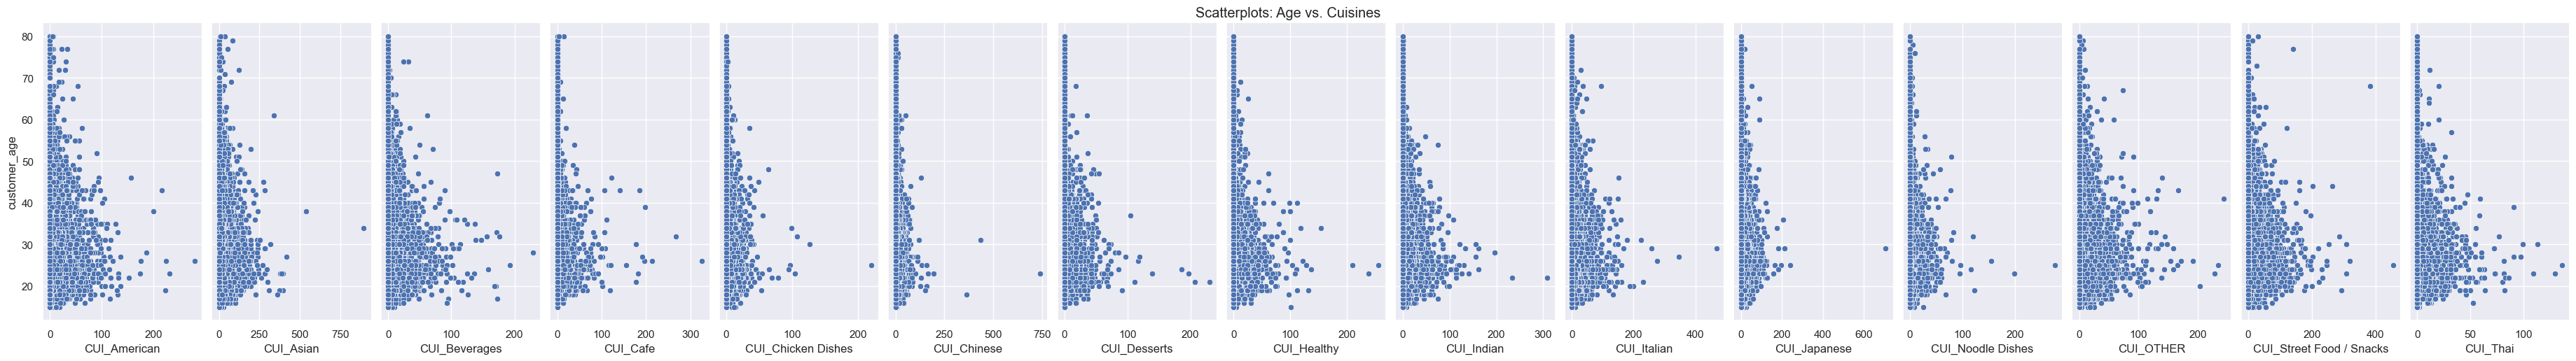

In [40]:
cuisines = [col for col in df.columns if col.startswith("CUI_")]
sns.set()
sns.pairplot(df, x_vars=cuisines, y_vars='customer_age', height=5, aspect=0.5)
plt.suptitle('Scatterplots: Age vs. Cuisines', y=1.02)
plt.show()

- In general for all cuisine types, younger individuals tend to exhibit higher expenditure, specially between 20 and 40 years old.

<a class="anchor" id="cuisineperage">

### **3.3.3** *'CUI_(...)'*  vs. *'customer_age'*

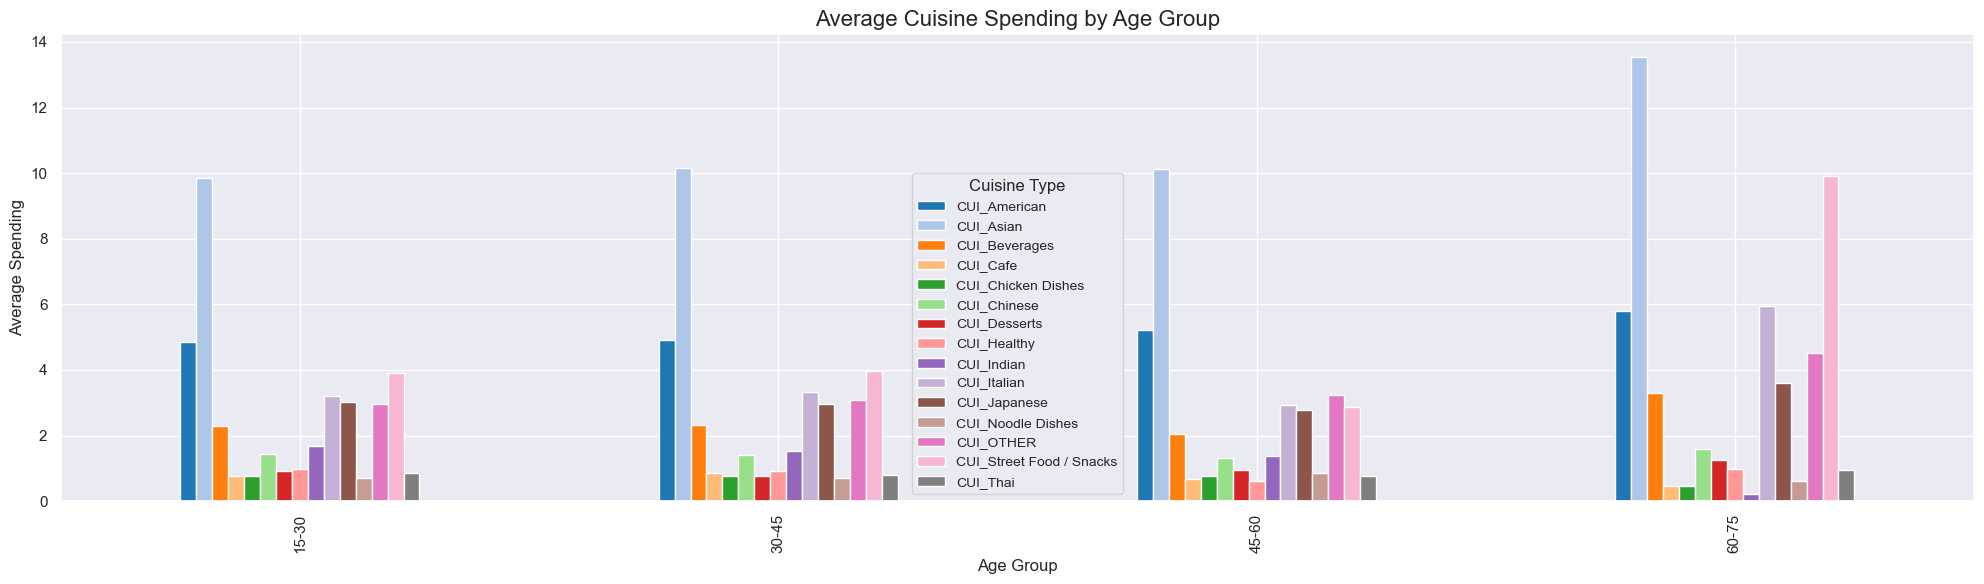

In [41]:
# Create age categories directly in the groupby function
bins = [15, 30, 45, 60, 75]
labels = ['15-30', '30-45', '45-60', '60-75']
cuisines = [col for col in df.columns if col.startswith("CUI_")]

# Calculate average spending for each cuisine type by age group
avg_spending = df.groupby(pd.cut(df['customer_age'], bins=bins, labels=labels))[cuisines].mean().reset_index()

avg_spending.set_index('customer_age').plot(kind='bar', figsize=(20, 6), color=palette)
plt.title('Average Cuisine Spending by Age Group', fontsize=16)
plt.ylabel('Average Spending', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.legend(title='Cuisine Type', fontsize='small')
plt.tight_layout()
plt.show()

**Analysis:**
- It is clear that expediture on Asian food dominates across all ages groups. American cuisine is also popular among all customers.

- Individuals aged between 60 and 75 tend to spend more on snacks and Italian cusine rather than other age groups, while Indian food is not popular among these customers.

- The other age groups have very similar spending habits when it comes to the types of cuisine.

<a class="anchor" id="firstperlastorder">

### **3.3.4** *'first_order'* vs. *'last_order'*

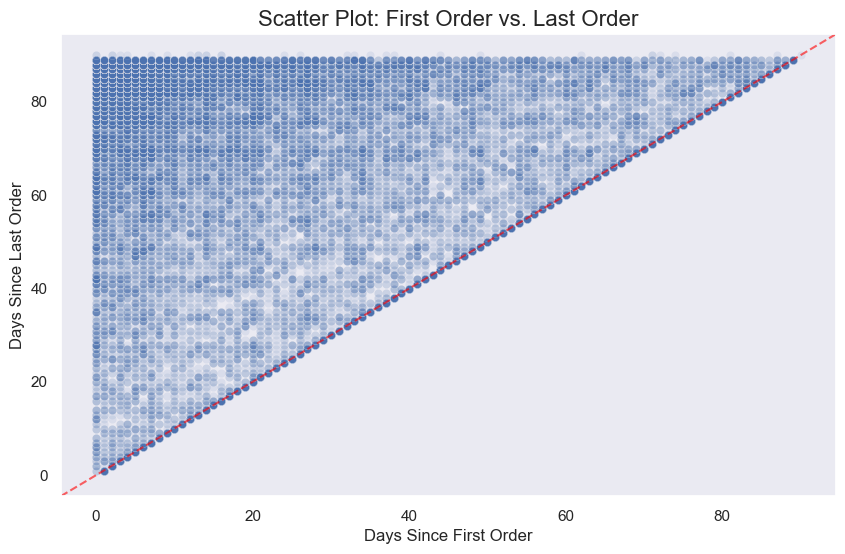

Number of customers where first order equals last order: 7192


In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='first_order', y='last_order', data=df, alpha=0.1)
plt.title('Scatter Plot: First Order vs. Last Order', fontsize=16)
plt.xlabel('Days Since First Order', fontsize=12)
plt.ylabel('Days Since Last Order', fontsize=12)
plt.axline((0, 0), slope=1, color='red',  alpha=0.6,linestyle='--')  # Line where first order = last order
plt.grid()
plt.show()
equal_count = (df['first_order'] == df['last_order']).sum()

print(f'Number of customers where first order equals last order: {equal_count}')

**Analysis:**
- Customers who have the same first and last order day (red line) have only bought one time.

- The higher density in the upper left corner of the plot suggests that many customers made their first order a long time ago but have made their last order recently. This indicates these customers are likely frequent and loyal.

-  The presence of some points in the upper right corner, while not as dense, suggests that there are customers who haven’t placed an order in a long time. This indicate inactive customers, possibly lost customers.

- Density on bottom left side indicates new customers whose first and last orders were recently. This represents new customers.

- Analysing the plot we can see more density in the line (1 time buyers), and also on the left top corner (frequent and loyal customers).

<a class="anchor" id="customeragepervendercount">

### **3.3.5** *'customer_age'* vs. *'vendor_count'* vs. *'product_count'*

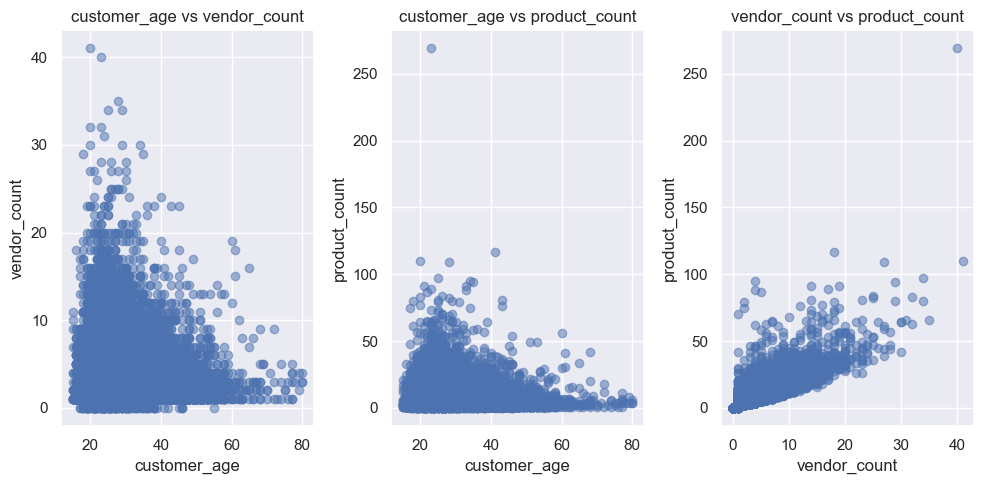

In [43]:
# Define the variables you want to plot
variables = ['customer_age', 'vendor_count', 'product_count']

# Create a figure for the plots with adjusted height
plt.figure(figsize=(10, 5))  # Set width to 10 and height to 5

# Create unique pairs of the variables
unique_pairs = list(itertools.combinations(variables, 2))

# Loop through the unique combinations to create scatter plots
for i, (var1, var2) in enumerate(unique_pairs):
    plt.subplot(1, len(unique_pairs), i + 1)  # Create subplots
    plt.scatter(df[var1], df[var2], alpha=0.5)  # Scatter plot for each pair
    plt.xlabel(var1)  # X-axis label
    plt.ylabel(var2)  # Y-axis label
    plt.title(f'{var1} vs {var2}')  # Title for each subplot

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

customer_age VS. vendor_count:
- Customers between 20 and 30s usually order from a higher number unique vendors than older customers.

customer_age VS. product_count:
- The majority of the high values for product count belong customers between 20 and 40 years old. Older individuals tend to buy a smaller amount of items.

vendor_count VS. product_count:
- When customer buy from more vendors they tend to buy a bigger quantity of products.

<a class="anchor" id="daybyhour">

### **3.3.6** DOW_(...) VS HR_(...)

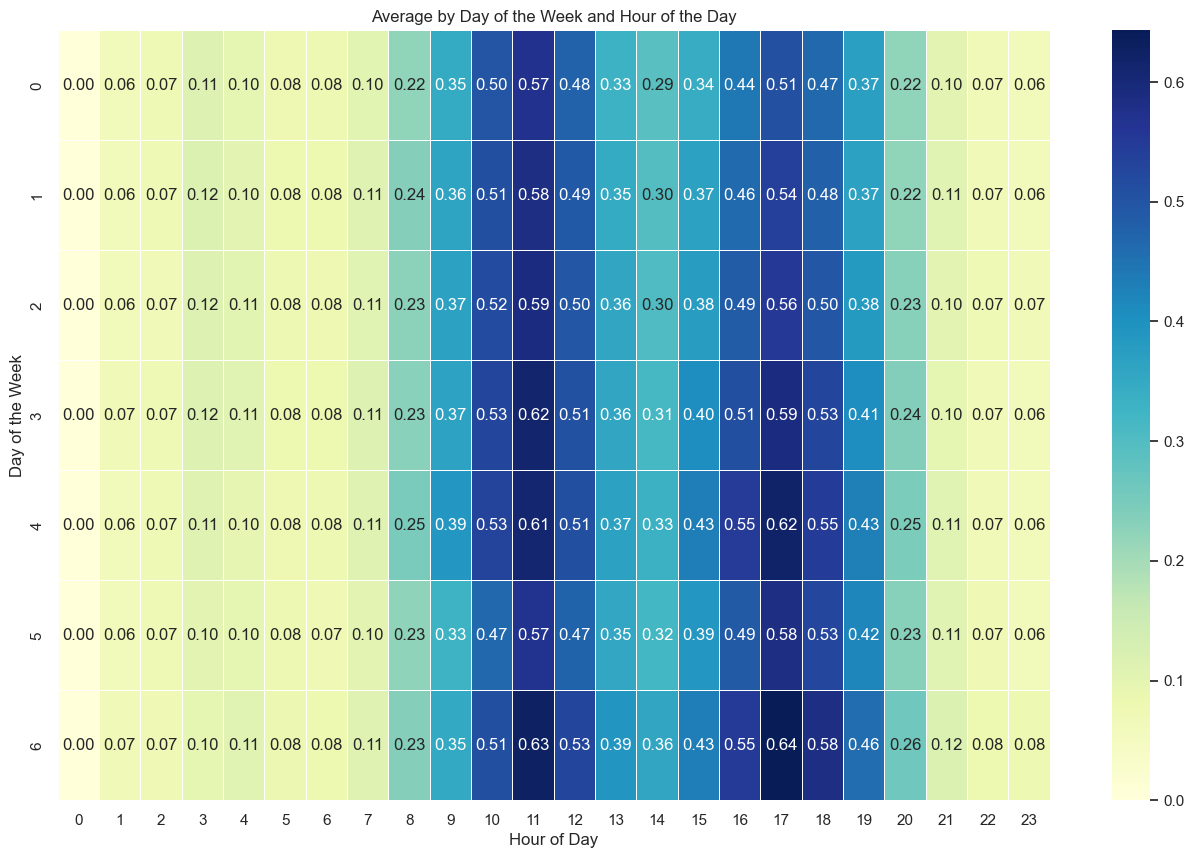

In [44]:
days = [col for col in df.columns if col.startswith("DOW_")]
hours = [col for col in df.columns if col.startswith("HR_")]

avg_orders = np.zeros((7, 24))  #7 days and 24h

# Iterate through the days of the week
for day in range(7):
    # Calculate the mean of orders for each hour of the current day
    avg_orders[day] = df[hours].multiply(df[days[day]], axis=0).mean().values

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(avg_orders, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.title("Average by Day of the Week and Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of the Week")
plt.show()

**Analysis:**
- Peak orders:
    - 11h: Particularly popular on Saturdays, Thursdays, and Wednesdays.
    - 17h: Especially on Saturdays and Thursdays.

- Average orders: Day hours in general for every day of the week.

- Least orders: Nigh hours regardless of the day.

<a class="anchor" id="corrmatrix">

### **3.3.7**  Metric Variables' Correlation Matrix


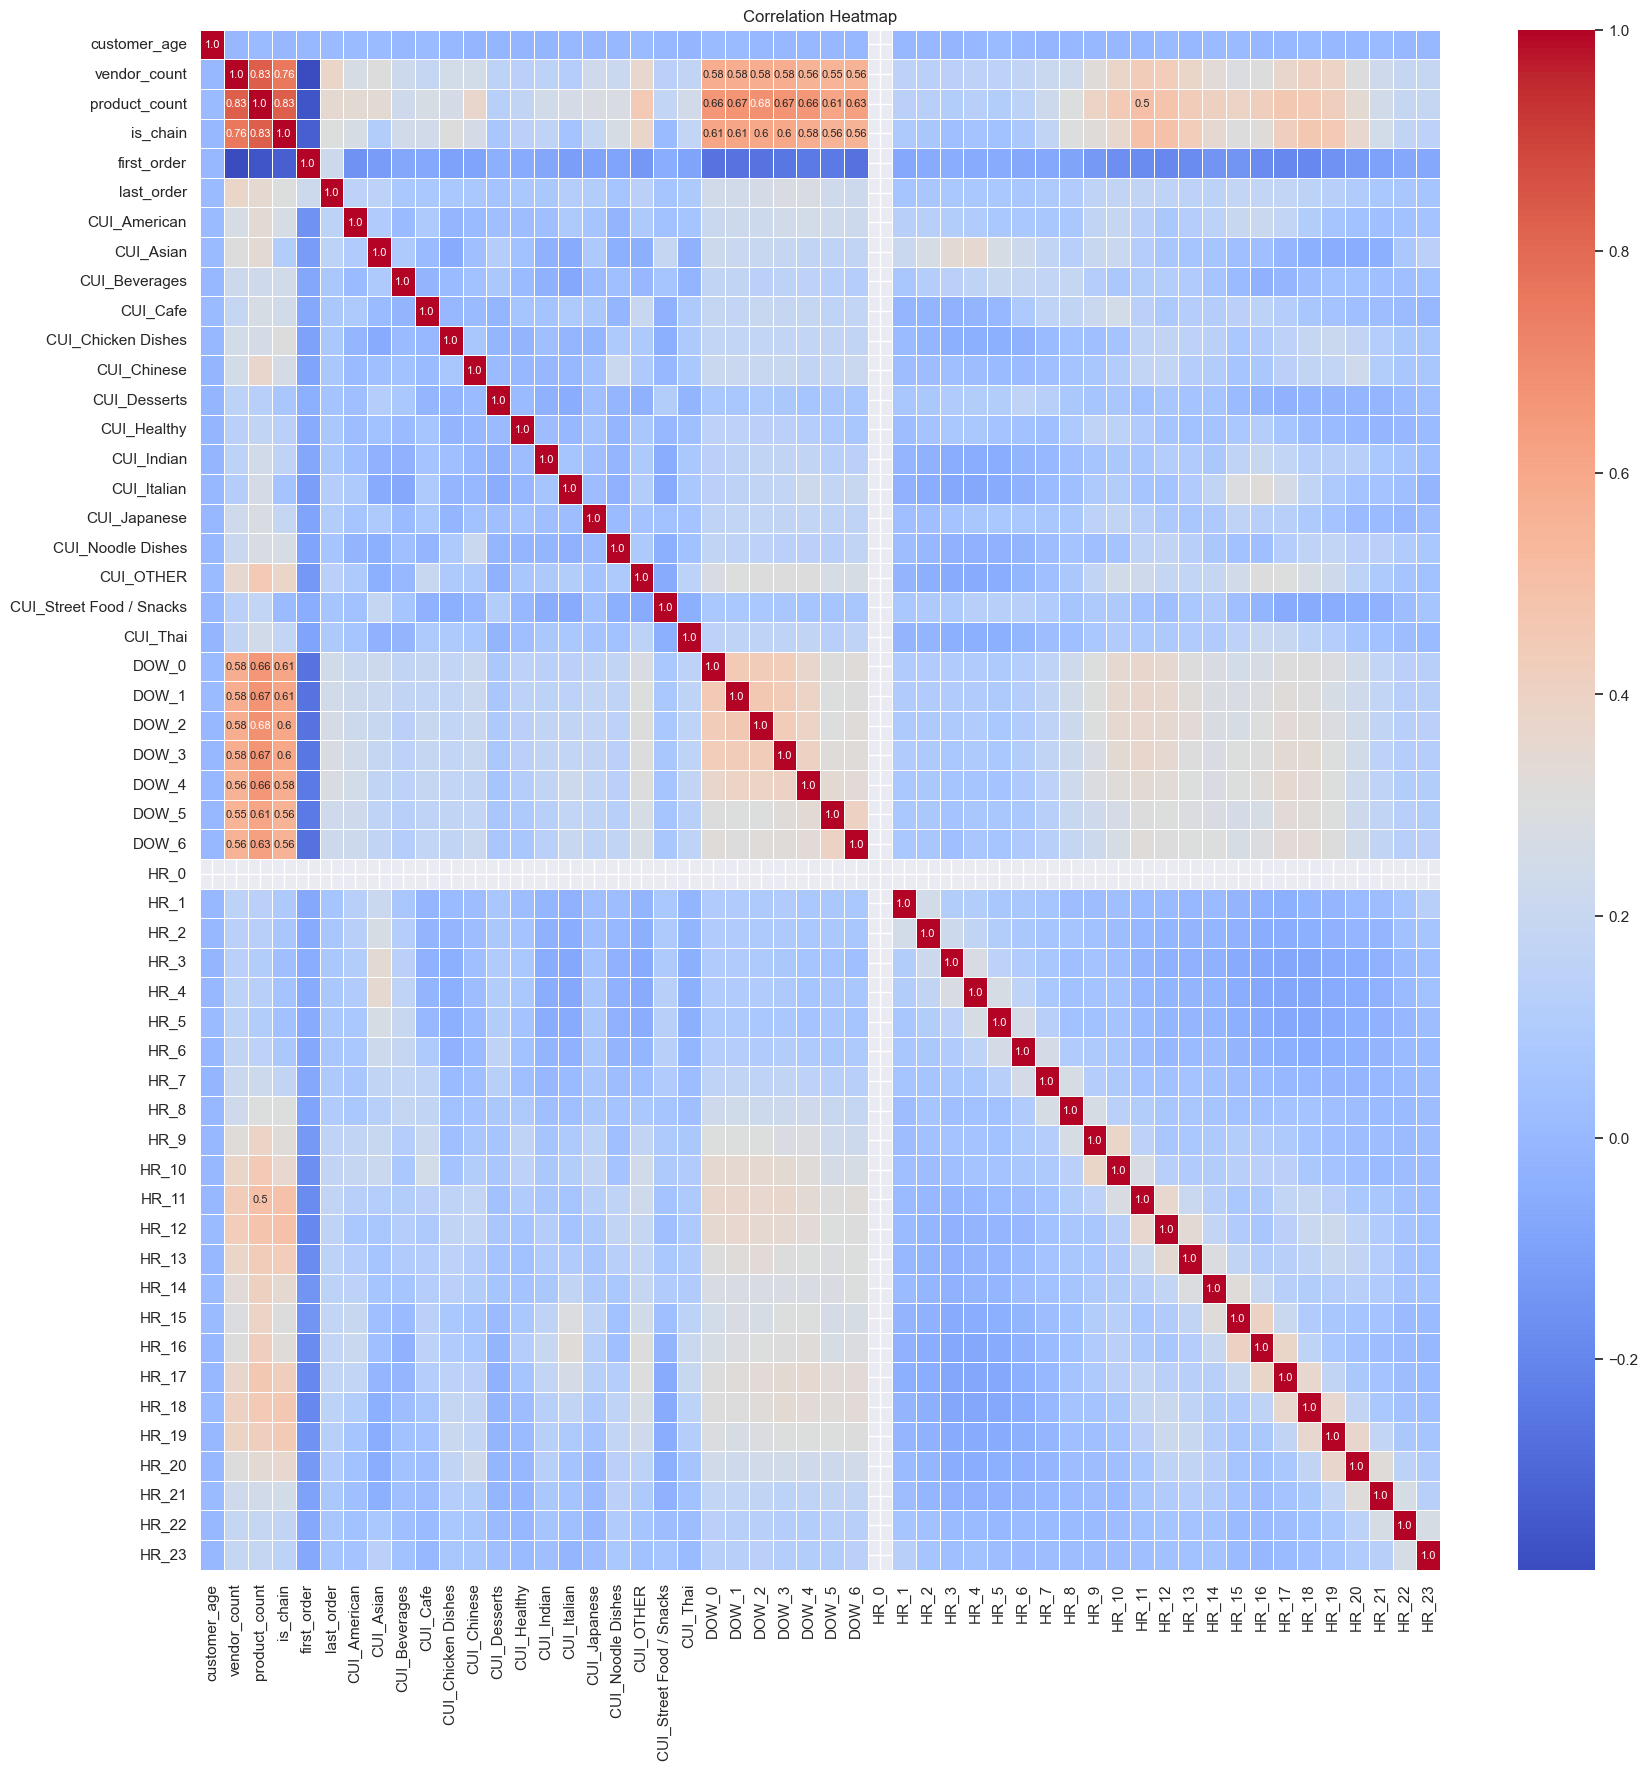

In [45]:
# Obtain correlation matrix

metric_features_corr = df[metric_features].select_dtypes(include=[np.number])


corr = metric_features_corr.corr(method="pearson")

corr = np.round(metric_features_corr.corr(method="pearson") , decimals=2)

plt.figure(figsize=(20, 20))
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))


sns.heatmap(data=corr,annot=annot,
            cmap="coolwarm", fmt='s', linewidths=0.5,annot_kws={"size": 8})

plt.title("Correlation Heatmap")
plt.show()

**Analysis:**
- There seems to be a correlation between days of the week and product_count, vendor_count and is_chain.

- Hours of the day also seem to correlate with product_count, vendor_count and is_chain.

- This suggests that customer time ordering behavior is influencing the number of products ordered, the number of vendors used, and the number of times ordering from a chain restaurant. Specific time frames that have a higher ordering activity, results in higher counts for products, vendors and chain orders.

- vendor_count  is linked to the total number of products ordered. As customers order from greater number of vendors, they are likely to purchase a bigger number of products, which lead to a natural increase in product_count.

- is_chain: We believe this variable holds the number of times a customer has ordered from a chain restaurant. Its correlation with both vendor_count and product_count supports this interpretation, because if an increase in product_count and vendor_count is associated with higher values of is_chain, it suggests that more frequent orders from chain restaurants are driving these increases. Therefore, it makes sense to conclude that is_chain effectively captures the frequency of orders made at chain restaurants.

<a class="anchor" id="categoricalbivariate">

## **3.4. Categorical Variables' Bivariate Analysis**

<a class="anchor" id="customerregionperlastpromo">

### **3.4.1** *'customer_region'*  vs.  *'last_promo'*

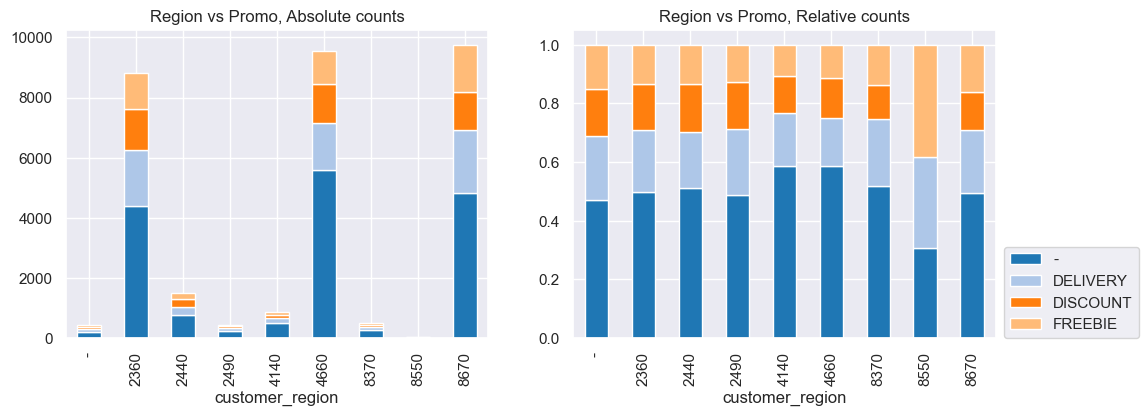

In [46]:
cat1 = 'customer_region'
cat2 = 'last_promo'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0], color=palette)
axes[0].set_title('Region vs Promo, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1], color=palette)
axes[1].set_title('Region vs Promo, Relative counts')
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot

plt.show()


plt.show()

- Again, when we are plotting the bar chart, for the '8550' the Absolute count or frequency is not visible, so we will once again apply a logarithmic scale.

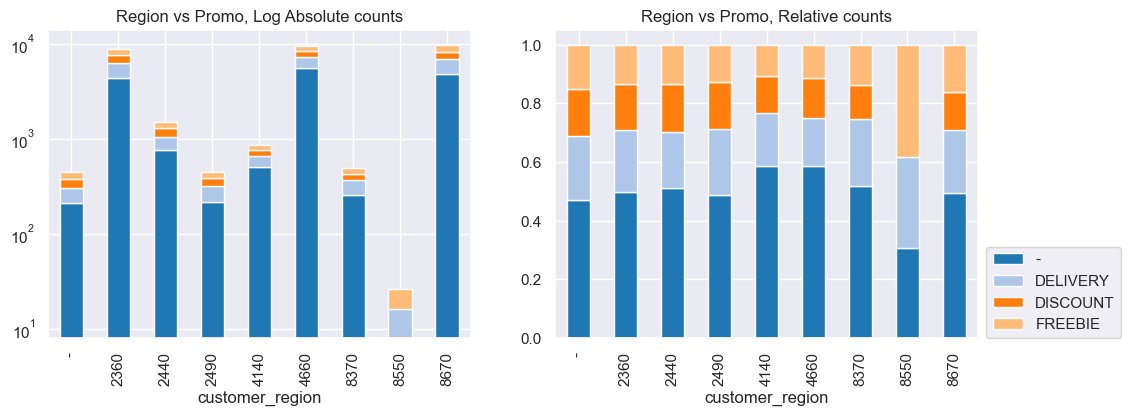

In [47]:
cat1 = 'customer_region'
cat2 = 'last_promo'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0], color=palette)
axes[0].set_title('Region vs Promo, Log Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_yscale("log")

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1], color=palette)
axes[1].set_title('Region vs Promo, Relative counts')
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot

plt.show()


plt.show()

**Analysis:**

- Regarding the regions '2360', '4660', and '8670' have the highest absolute frequency of transactions(over than 8000), as they are the most representative regions in the dataset;

- Other regions have much lower absolute counts, with some regions barely reaching 1,000;

- The "DELIVERY" promotion (orange) and the "-" category (blue) dominate in all regions, with smaller proportions for "DISCOUNT" (green) and "FREEBIE" (red);

- Proportionally, regions are fairly consistent in terms of promotion types. The "-" category (that we interpreted as no discount used) consistently makes up the largest proportion across all regions;

- Regions '4140' and '4660' stand out as the ones that have a higher relative frequency for no promotion code used.

- However, it is noticaeble that the most frequent discount in region '8550' is 'Freebie', and in a region with very low abolute frequency, that could be related to missing / unknown data or just a specific preference of this region. In this region there is no code 'Discount' as well.

<a class="anchor" id="customerregionperpayment">

### **3.4.2** *'customer_region'* vs. *'payment_method'*

- Once again, logarithmic scale will be applied in order for region '8550' to be visible.


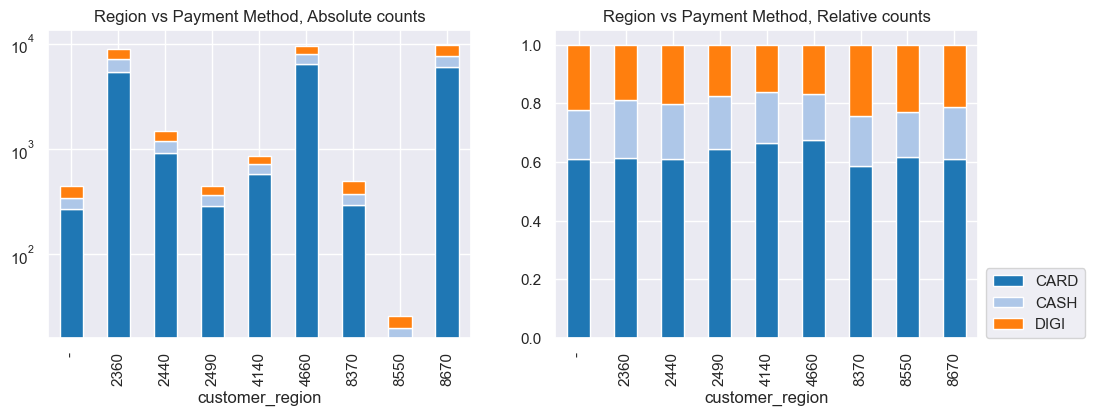

In [48]:
cat1 = 'customer_region'
cat2 = 'payment_method'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0], color=palette)
axes[0].set_title('Region vs Payment Method, Absolute counts')
axes[0].legend([], frameon=False)
axes[0].set_yscale("log")                                 #Hide legend on right subplot

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1], color=palette)
axes[1].set_title('Region vs Payment Method, Relative counts')
axes[1].legend(loc=(1.02,0))                                        #Reposition legend on right subplot

plt.show()


plt.show()

**Analysis:**
- Regions '2360', '4660', and '8670' have the highest absolute counts of transactions, as we could predict due to the higher customer activity compared to other regions.

- In regions with high transaction counts '2360', '4660', '8670', the "CARD" payment method is the most frequently used, followed by "DIGI" and "CASH."

- Regions such as '2440', '4140', and '8370' have relatively low transaction counts, suggesting less activity or fewer customers in these areas.

- In terms of proportions, "CARD" is the most popular payment method in nearly every region, with "DIGI" and "CASH" following in a similar distribution.

- The relative proportions of payment methods are consistent across regions, indicating similar payment preferences regardless of region.

<a class="anchor" id="lastpromoperpayment">

### **3.4.3** *'last_promo'* vs. *'payment_method'*

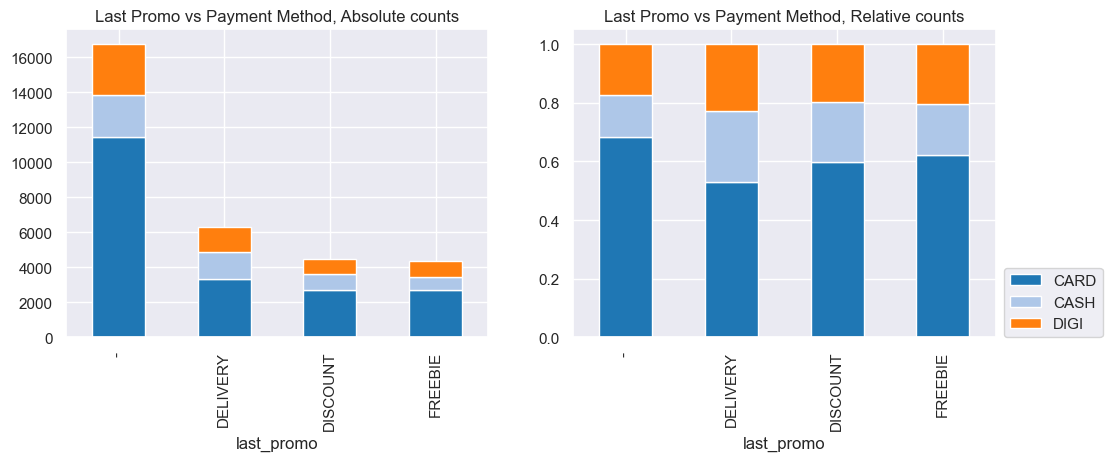

In [49]:
cat1 = 'last_promo'
cat2 = 'payment_method'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0], color=palette)
axes[0].set_title('Last Promo vs Payment Method, Absolute counts')
axes[0].legend([], frameon=False)                                #Hide legend on right subplot

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1], color=palette)
axes[1].set_title('Last Promo vs Payment Method, Relative counts')
axes[1].legend(loc=(1.02,0))                                        #Reposition legend on right subplot

plt.show()


plt.show()

**Analysis:**
- For all promotion types, "CARD" is consistently the most popular payment method, making up the largest proportion in each category;

- "DIGI" and "CASH" have smaller, roughly equal proportions across different promotion types;

- For customers that use the 'DELIVERY' promotion code there is a slight bigger tendency to use cash or digital method for payments than for customer who use other promotion code or none.

- The distribution of payment methods remains fairly consistent across different promotions, indicating no strong preference for specific payment methods based on the promotion type.

<a class="anchor" id="catnumerical">

## **3.5. Categorical / Numerical Variables' Bivariate Analysis**

<a class="anchor" id="regionperage">

### **3.5.1** *'customer_region'* vs. *'customer_age'*

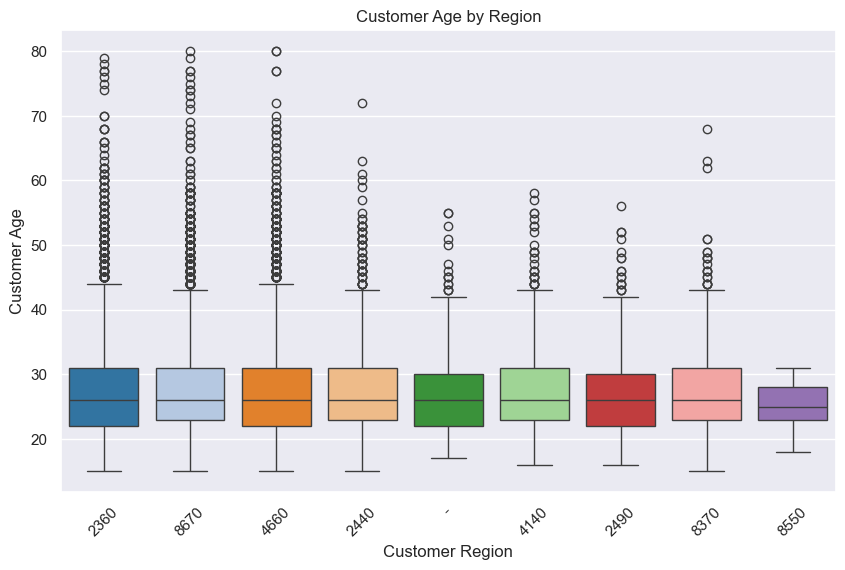

In [50]:
# Customer_region vs. Customer_age
plt.figure(figsize=(10, 6)) # Set the figure size for the plot

sns.boxplot(x="customer_region", y="customer_age", data=df, palette=palette)
plt.title("Customer Age by Region")
plt.xlabel("Customer Region")
plt.ylabel("Customer Age")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if there are many regions

plt.show()

**Analysis:**
- Customer ages are relatively similar across different regions, with most ages concentrated between 20 and 30s.

- Certain regions, like 2360 and 4660, show more age outliers compared to others. This may be due to these regions having larger populations, which increases age variability.

- Overall, the age distribution is consistent across regions, indicating that the age profile of customers does not vary significantly from one region to another.

<a class="anchor" id="regionperproduct">

### **3.5.2** *'customer_region'* vs *'product_count'*

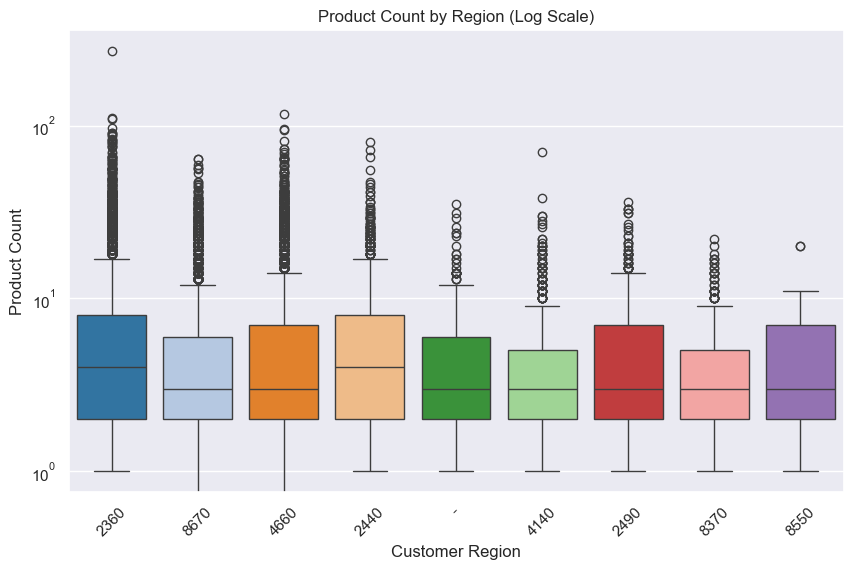

In [51]:
# Customer_region vs. Product_count (boxplot with log transformation)
plt.figure(figsize=(10, 6))
sns.boxplot(x="customer_region", y="product_count", data=df, palette=palette, hue="customer_region")
plt.title("Product Count by Region (Log Scale)")
plt.xlabel("Customer Region")
plt.ylabel("Product Count")
plt.xticks(rotation=45)

# Set y-axis to log scale
plt.yscale('log')

plt.show()


- The log scale helps to visualize the spread of product counts better by compressing the effect of extreme outliers.

**Analysis:**

- Most regions have a similar distribution in product count, with medians falling within a similar range, suggesting consistency in customer purchasing behavior across regions.

- Regions like 2360 and 4660 show slightly wider distributions, indicating more variability in the number of products purchased by customers in these areas.

<a class="anchor" id="regionpervendor">

### **3.5.3** *'customer_region'* vs. *'vendor_count'*

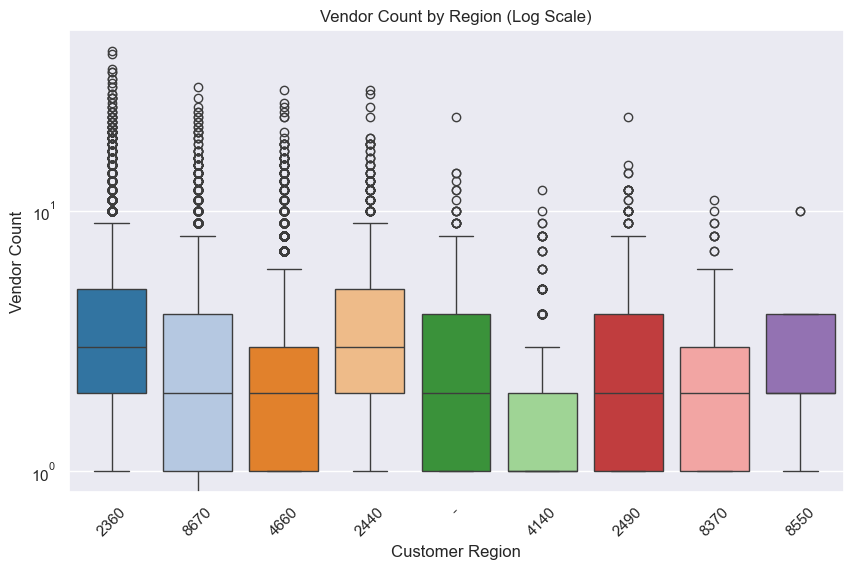

In [52]:
# Customer_region vs Vendor_count (log scale)

# Boxplot with Logarithmic Scale
plt.figure(figsize=(10, 6))
sns.boxplot(x="customer_region", y="vendor_count", data=df, palette=palette)
plt.title("Vendor Count by Region (Log Scale)")
plt.xlabel("Customer Region")
plt.ylabel("Vendor Count")
plt.xticks(rotation=45)

# Set y-axis to log scale
plt.yscale('log')
plt.show()

**Analysis:**

- Regions 2360 and 2440 have the highest medians, indicating that customers in these areas order from a greater variety of vendors. In contrast, Region 8670 has a lower bound of 0, meaning some customers ordered from only one vendor, showing limited variety.

- Region 4140 exhibits the lowest values overall, suggesting customers here typically order from fewer vendors.

- Outliers are prominent in Regions 2360, 8670, 4660, and 2440, with Region 2360 standing out for extreme outliers reaching into the 40s.

- Meanwhile, Regions 8550, 8370, and 4140 show fewer and less severe outliers, with maximum values just above 10.

- Despite the variations, the median vendor count across most regions is around 5, indicating that typical customers interact with a moderate number of vendors, while a few exhibit much higher diversity in their selections.

<a class="anchor" id="regionperfirstperlast">

### **3.5.4** *'customer_region'* vs *'first_order'* vs *'last_order'*

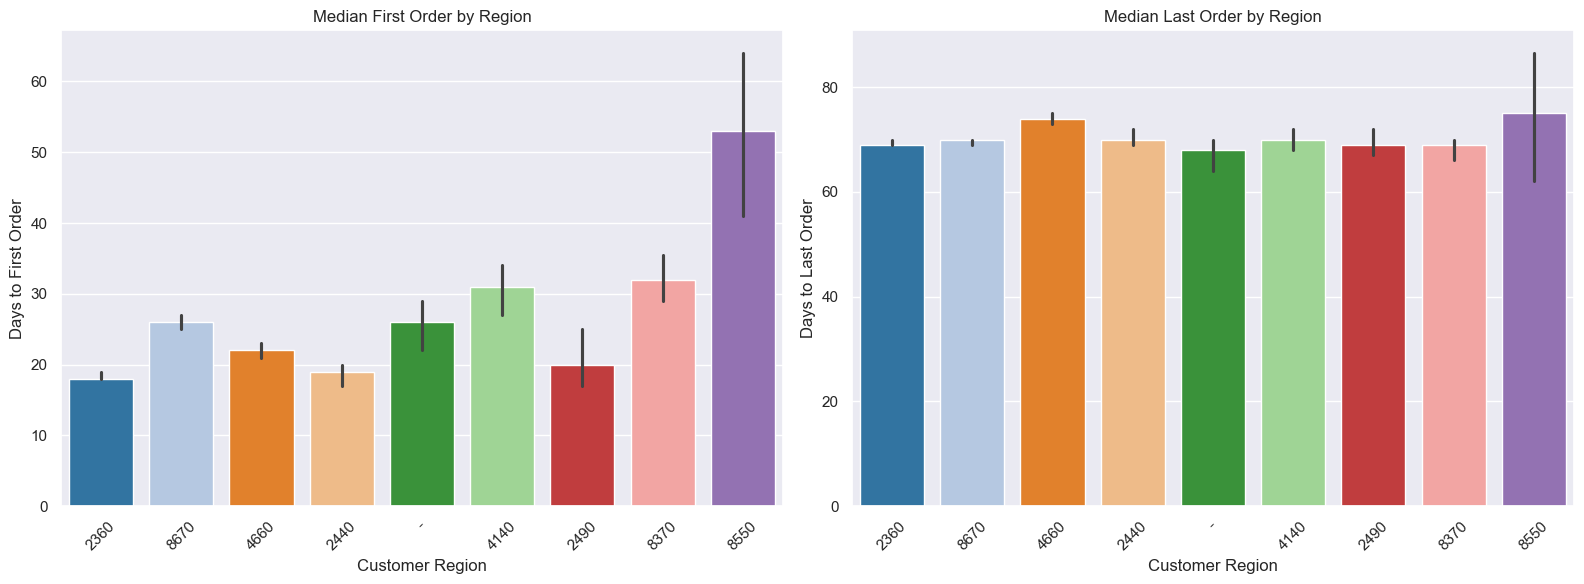

In [53]:
# Customer_region vs First_order / Last_order
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure with 1 row and 2 columns to plot side-by-side bar plots
sns.barplot(x="customer_region", y="first_order", data=df, estimator=np.median, palette=palette, ax=axes[0])
axes[0].set_title("Median First Order by Region")
axes[0].set_xlabel("Customer Region")
axes[0].set_ylabel("Days to First Order")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(x="customer_region", y="last_order", data=df, estimator=np.median, palette=palette, ax=axes[1])
axes[1].set_title("Median Last Order by Region")
axes[1].set_xlabel("Customer Region")
axes[1].set_ylabel("Days to Last Order")
axes[1].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

**Analysis:**
- In the first graph, "Median First Order by Region,":

  - The median number of days until the first order ranges between 20 and 30 days.

  - Regions 2360, 2440, and 2490 have slightly lower values, just below 20 days, suggesting that customers in these areas tend to order for the first time relatively quickly.

  - Regions 4140 and 8370 are slightly above 30 days, indicating that customers may take a bit longer to make their first order. Meanwhile, **Region 8550** stands out with a median just above 50 days, which could suggest that customers here are less inclined to place their first order or may take longer to decide.

- In the second graph, "Median Last Order by Region":

  - The medians are quite similar across regions, generally around 70 days, indicating a relatively consistent ordering behavior.

  - However, Regions 4660 and 8550 exceed 70 days, suggesting that customers in these areas have placed their most recent orders more recently compared to others, reflecting a potentially more active customer base.

<a class="anchor" id="regionpercui">

### **3.5.5** *'customer_region'* vs. *'CUI_(...)'*

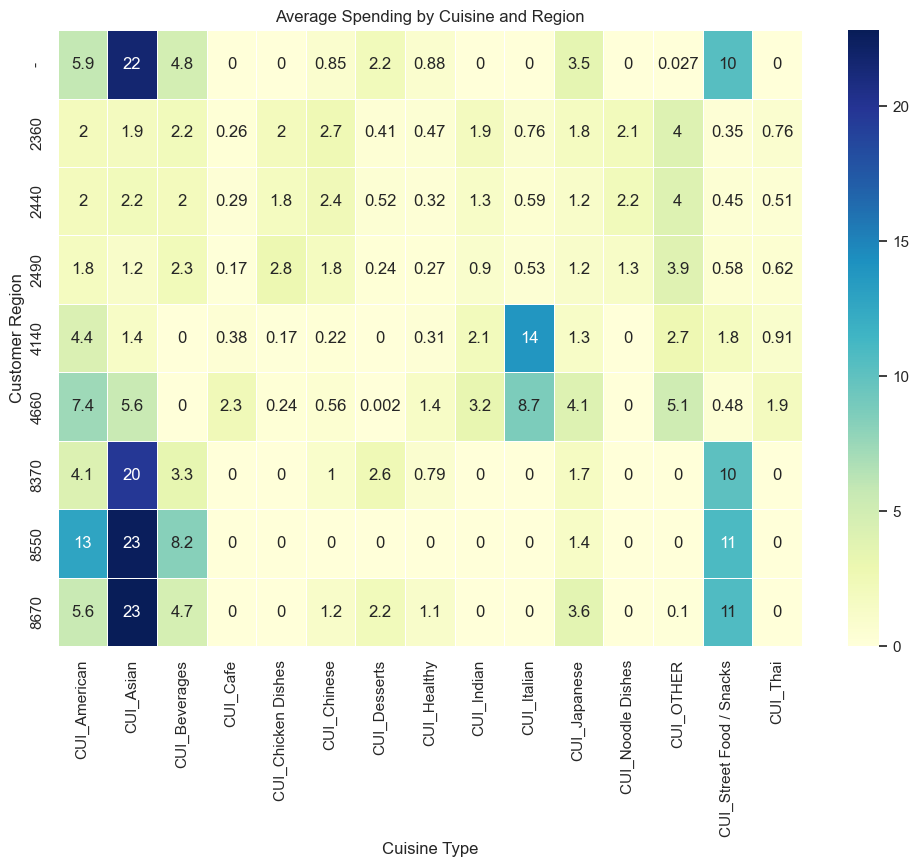

In [54]:
# Customer_region vs CUI_American to CUI_Thai (Heatmap)
cuisines = [col for col in df.columns if col.startswith("CUI_")]
df_cui = df.groupby("customer_region")[cuisines].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(df_cui, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Spending by Cuisine and Region")
plt.xlabel("Cuisine Type")
plt.ylabel("Customer Region")
plt.show()

**Analysis:**

- Regions 8550, 8670, and 8370 show higher spending on CUI_American, CUI_Asian, and CUI_Street Food / Snacks, but they have limited variety, with most other cuisines showing zero spending. This indicates a preference for a few specific types of food.

- In contrast, other regions like 4660 and 4140 display less overall spending but maintain a broader variety of cuisine options, as they do not have many zeros across categories. This suggests that while they may not spend as much on any single cuisine, they are open to trying different types.

- Overall, it highlights a contrast between regions with focused spending on a few popular cuisines versus those with a more diverse range of preferences but lower spending levels.

<a class="anchor" id="regionperdow">


### **3.5.6** *'customer_region'* vs. *'DOW_(...)'*

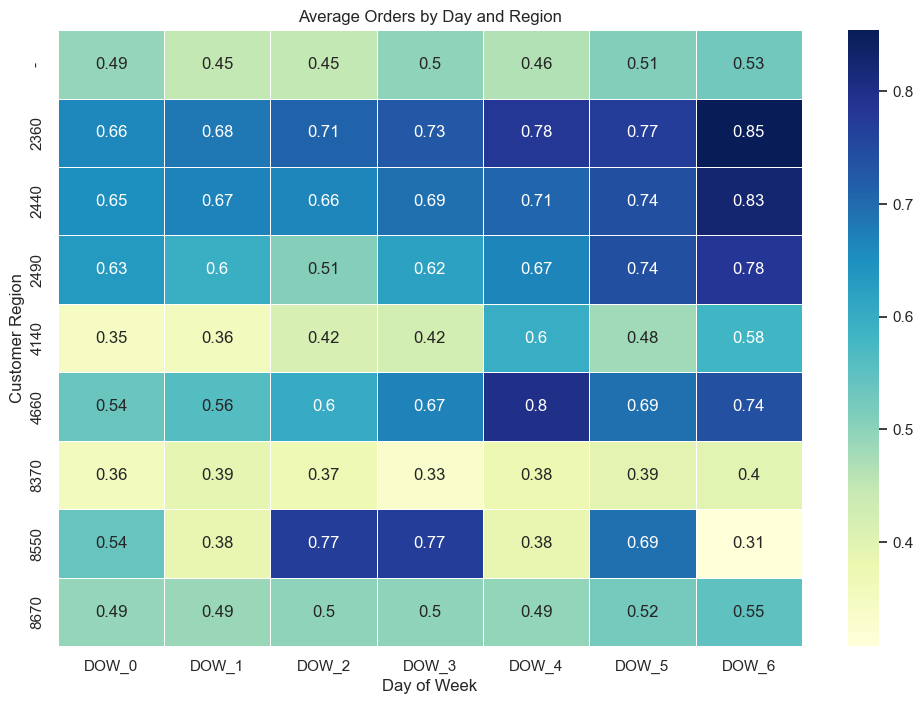

In [55]:
# Customer_region vs DOW_0 to DOW_6 (Heatmap)
days = [col for col in df.columns if col.startswith("DOW_")]
df_days = df.groupby("customer_region")[days].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(df_days, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Orders by Day and Region")
plt.xlabel("Day of Week")
plt.ylabel("Customer Region")
plt.show()

**Analysis:**

- Overall, customers order the most on **Fridays** (DOW_5) and Saturdays (DOW_6), indicating a strong preference for weekend orders.

- Regions 2360 and 2440 show higher average orders, particularly on weekends, suggesting they are more active during this time.

- Region 4660 also sees increased orders on Saturdays.

- In contrast, Region 8370 consistently has the lowest average orders throughout the week.Region 4140 also has lower averages, but not as consistently low.

- We can see clear differences in ordering habits, with some regions favoring weekend orders while others, like 8370, show less frequent ordering overall.

<a class="anchor" id="regionperhr">


### **3.5.7** *'customer_region'* vs. *'HR_(...)'*

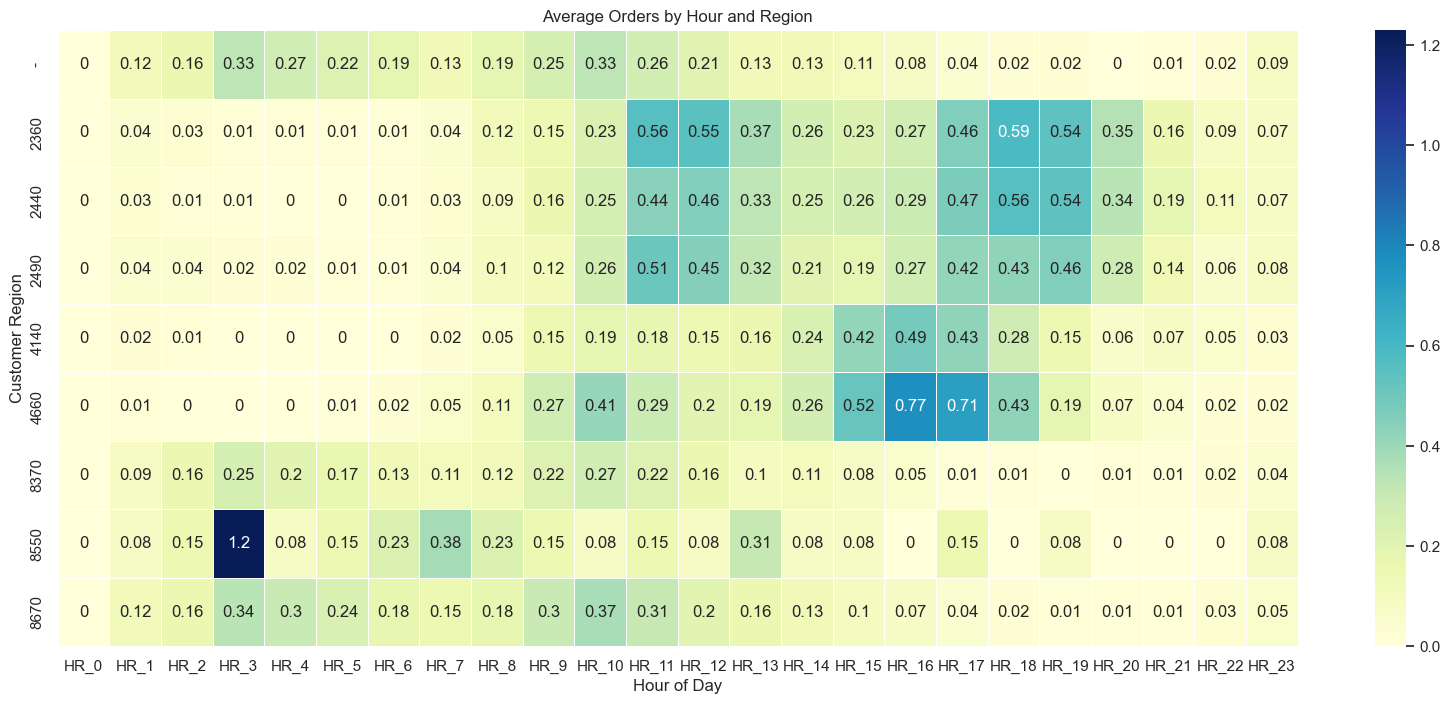

In [56]:
# Customer_region vs HR_0 to HR_23 (Heatmap)
hours = [col for col in df.columns if col.startswith("HR_")]
df_hours = df.groupby("customer_region")[hours].mean().round(2) # Round to 2 decimal places
plt.figure(figsize=(20, 8))
sns.heatmap(df_hours, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Orders by Hour and Region")
plt.xlabel("Hour of Day")
plt.ylabel("Customer Region")
plt.show()

**Analysis:**

- Regions 2360, 2440, 2490, 4140, and 4660 have very low orders from HR_21 (9 PM) to HR_9 (9 AM), peaking between HR_10 (10 AM) and HR_20 (8 PM).
  
- Regions 8370, 8550, 8670, and '-' (unknown) show lower orders from HR_15 (3 PM) to HR_1 (1 AM), with higher activity during other hours.

- Notably, region 8550 has a significant peak at HR_3 (3 AM), indicating a much higher concentration of orders at this time compared to other hours.

- All regions have a value of 0 orders at HR_0 (midnight), suggesting a possible data issue.

<a class="anchor" id="promoperage">


### **3.5.8** *'last_promo'* vs. *'customer_age'*

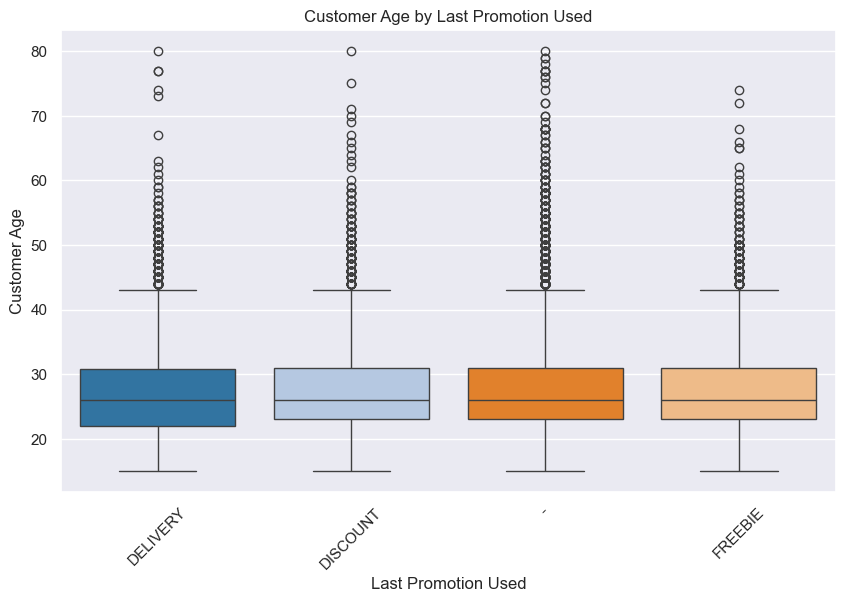

In [57]:
# Last_promo vs Customer_age
plt.figure(figsize=(10, 6))
sns.boxplot(x="last_promo", y="customer_age", data=df, palette=palette)
plt.title("Customer Age by Last Promotion Used")
plt.xlabel("Last Promotion Used")
plt.ylabel("Customer Age")
plt.xticks(rotation=45)
plt.show()

**Analysis:**

- The boxplots are similar, with medians around 25 years old and most ages between the 20s and 30s. This suggests that younger customers tend to engage more with promotions.

- The upper limits for ages reach into the 40s, indicating that customers of various ages are influenced by promotions.

- The presence of outliers up to 80 years old shows that some older customers also engage with promotions, though they are less common.

<a class="anchor" id="promopervendor">

### **3.5.9** *'last_promo'* vs. *'vendor_count'*

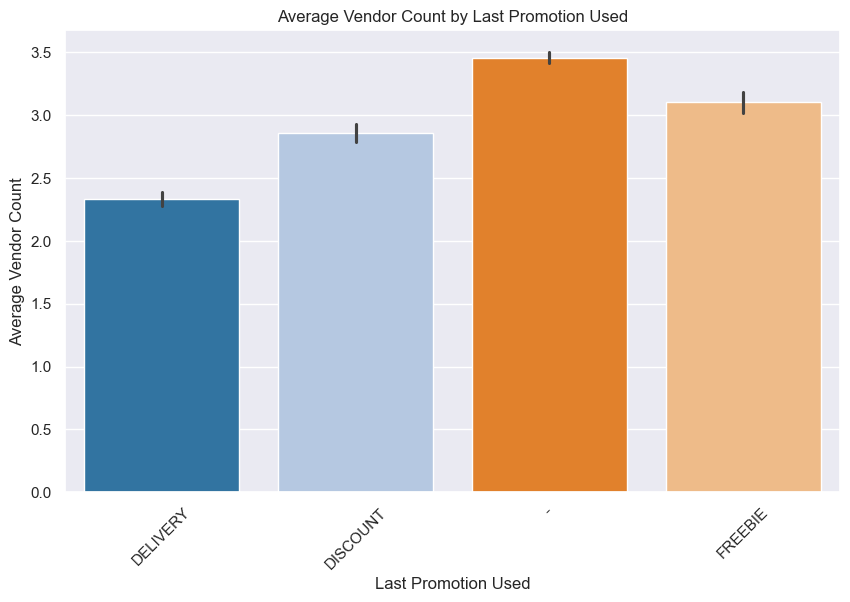

In [58]:
# Last_promo vs Vendor_count
plt.figure(figsize=(10, 6))
sns.barplot(x="last_promo", y="vendor_count", data=df, estimator=np.mean, palette=palette)
plt.title("Average Vendor Count by Last Promotion Used")
plt.xlabel("Last Promotion Used")
plt.ylabel("Average Vendor Count")
plt.xticks(rotation=45)
plt.show()

**Analysis:**

- For those who last used the "Delivery" promotion, the average vendor count is about 2.3. This suggests that customers taking advantage of delivery services may prefer a limited selection of vendors.

- Customers who used the "Discont" promotion show a slightly higher average vendor count of around 2.8, indicating they might be more open to exploring various options.

- The "Freebie" category has an even higher average vendor count at approximately 3.1, suggesting that promotions offering freebies could encourage customers to try different vendors.

- Finally, the category represented by the symbol '-', which could indicate customers who have never used any promotions, has the highest average vendor count at about 3.4. This implies that these customers may enjoy exploring a wider variety of vendors, possibly because they do not feel limited by promotional offers.

<a class="anchor" id="promoperproduct">

### **3.5.10** *'last_promo'* vs. '*product_count*'

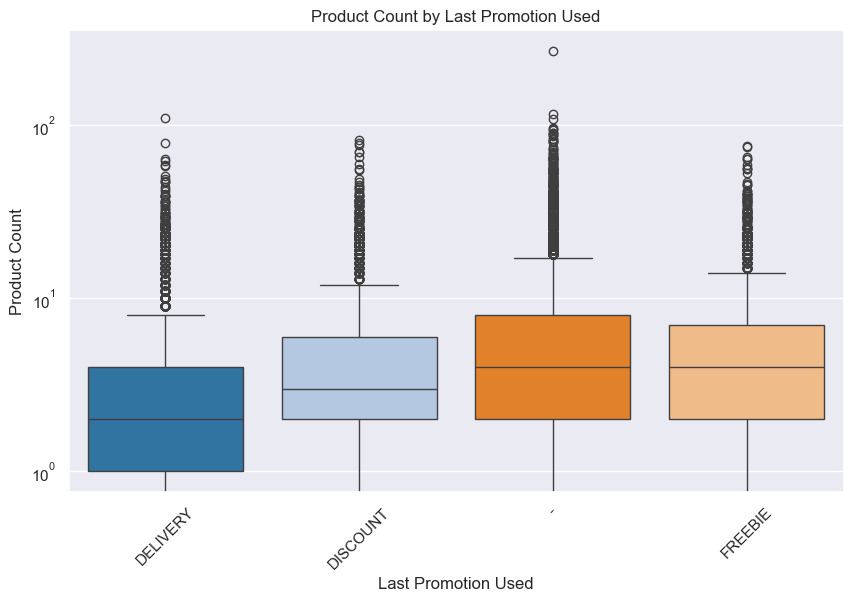

In [59]:
# Last_promo vs Product_count
plt.figure(figsize=(10, 6))
sns.boxplot(x="last_promo", y="product_count", data=df, palette=palette)
plt.title("Product Count by Last Promotion Used")
plt.xlabel("Last Promotion Used")
plt.ylabel("Product Count")
plt.xticks(rotation=45)

# Set y-axis to log scale
plt.yscale('log')
plt.show()

**Analysis:**

- We can see that the median for the "Delivery" category is the lowest, suggesting that customers who used this promotion tend to order fewer products.

- On the other hand, the categories "Discont" and "Freebie" have similar median values, but the category represented by '-' has slightly higher values. This could indicate that customers who may not have actively sought discounts still order a more varied selection of products, leading to a higher average product count.

- All categories exhibit outliers, with the '-' category showing more severe outliers, which might suggest a greater variation in product ordering habits among those customers.

<a class="anchor" id="paymentperage">

### **3.5.11** *'payment_method'* vs. *'customer_age'*

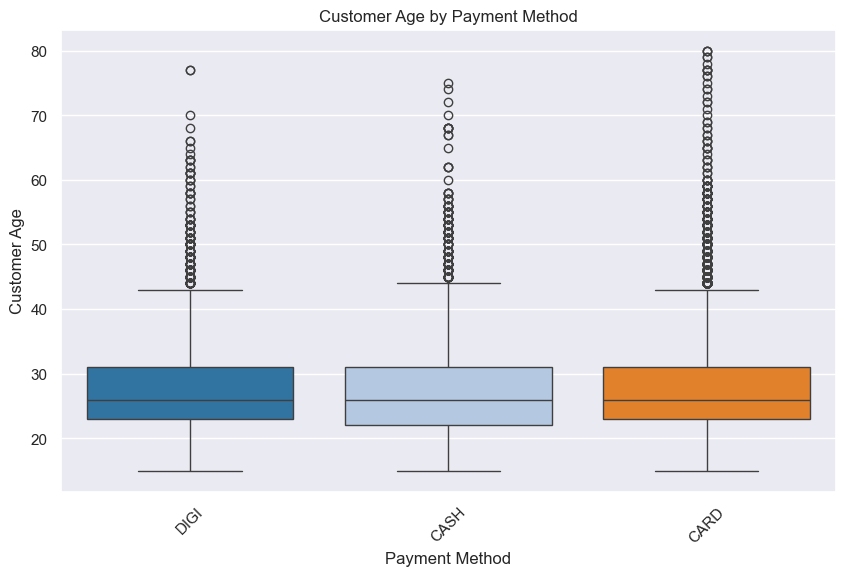

In [60]:
# Payment_method vs Customer_age
plt.figure(figsize=(10, 6))
sns.boxplot(x="payment_method", y="customer_age", data=df, palette=palette)
plt.title("Customer Age by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Customer Age")
plt.xticks(rotation=45)
plt.show()

**Analysis:**

- The age distribution across the payment methods DIGI, CASH, and CARD appears quite similar, with little noticeable difference among them. However, we can observe that DIGI has outliers extending up to around 70 years of age, while CASH and CARD have higher outliers, reaching up to about 75 and 80 years, respectively. The first quartile for CASH is slightly lower than that of DIGI and CARD, but the difference is minimal.

- This suggests that while customers using different payment methods are generally of similar ages, there are some older customers who prefer using CASH or CARD, indicating a possible trend towards older individuals favoring traditional payment methods over digital ones.

<a class="anchor" id="paymentpercui">

### **3.5.12** *'payment_method'* vs. *'CUI_(...)'*

Text(117.24999999999999, 0.5, 'Payment Method')

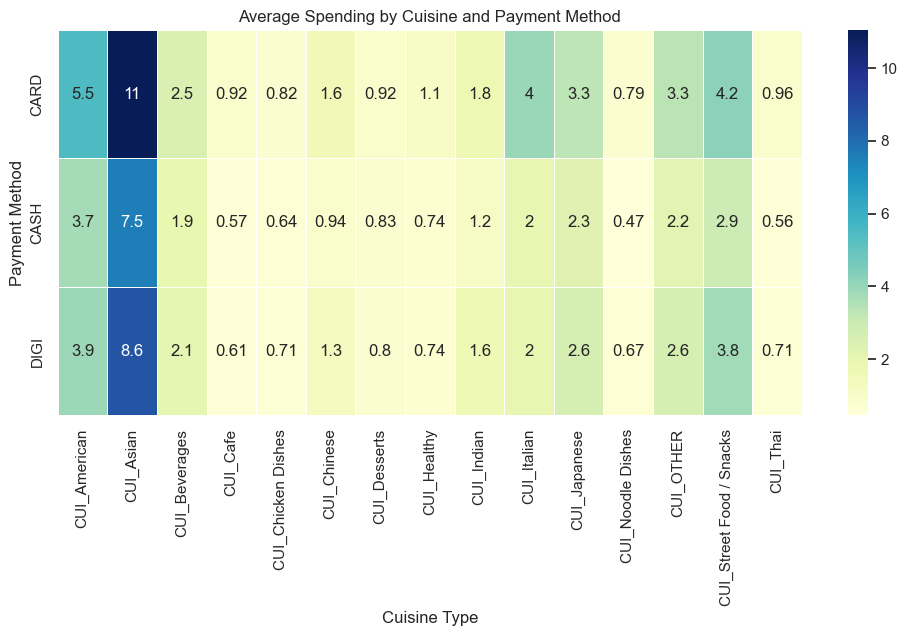

In [61]:
# Payment_method vs CUI_American to CUI_Thai (Heatmap)
df_cui_payment = df.groupby("payment_method")[cuisines].mean()
plt.figure(figsize=(12, 5))
sns.heatmap(df_cui_payment, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Spending by Cuisine and Payment Method")
plt.xlabel("Cuisine Type")
plt.ylabel("Payment Method")

**Analysis:**

- Overall, customers using CARD tend to spend the most on each cuisine, followed by those using DIGI, while CASH users spend the least. This might mean that customers who use cards are generally more willing to spend, maybe because cards make payments easier or offer benefits.

- There doesn’t seem to be any cuisine where one payment method stands out as more popular than the others. Instead, the spending differences stay fairly steady across all types of food, suggesting that spending habits are more related to payment choice than to specific cuisine preferences.

<a class="anchor" id="paymentperdow">

### **3.5.13** *'payment_method'* vs. *'DOW_(...)'*

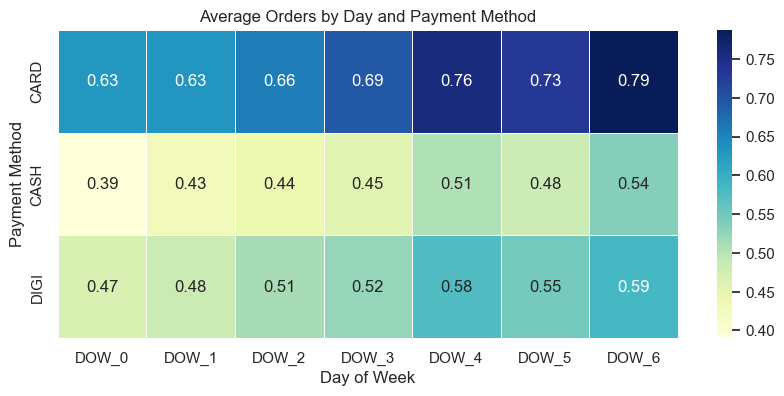

In [62]:
# 13. Payment_method vs Day of the Week (Heatmap)
df_days_payment = df.groupby("payment_method")[days].mean()
plt.figure(figsize=(10, 4))
sns.heatmap(df_days_payment, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Orders by Day and Payment Method")
plt.xlabel("Day of Week")
plt.ylabel("Payment Method")
plt.show()

**Analysis:**

- Across all days, CARD is consistently the most-used payment method, followed by DIGI and then CASH. This pattern doesn't shift by day, suggesting that payment preference remains steady regardless of the day.

- However, there are slight increases in order volumes on certain days for all methods, especially as the week progresses.


<a class="anchor" id="paymentperhr">

### **3.5.14** *'payment_method'* vs. *'HR_(...)'*

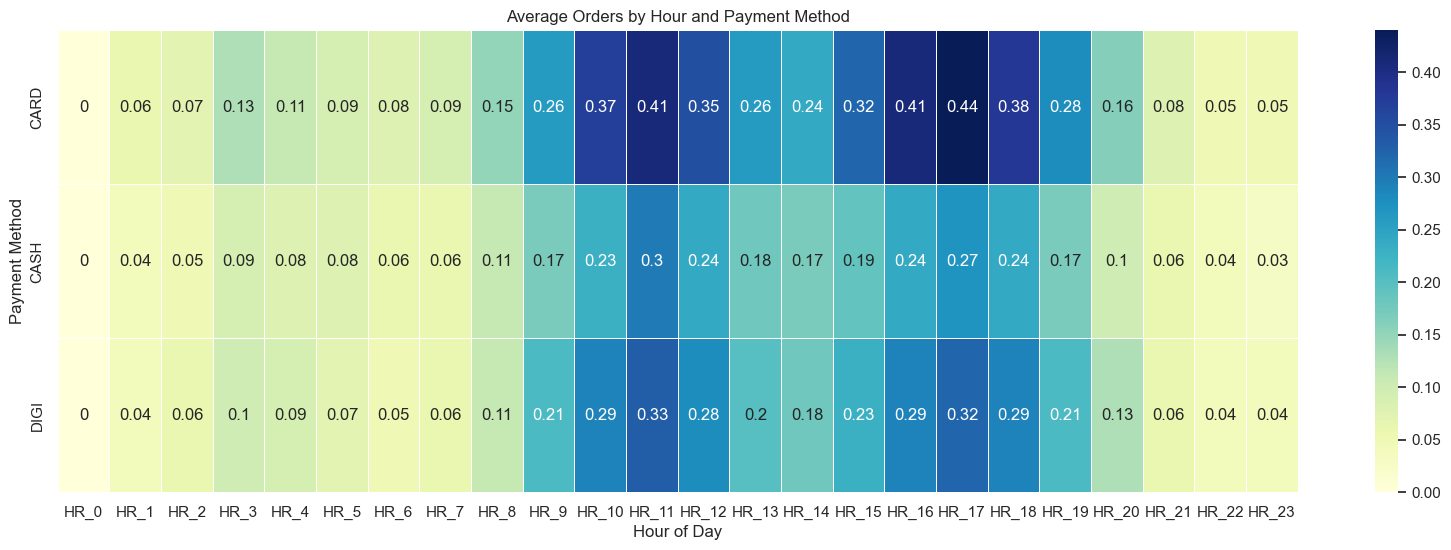

In [63]:
# Payment_method vs HR_0 to HR_23 (Heatmap)
df_hours_payment = df.groupby("payment_method")[hours].mean().round(2)
plt.figure(figsize=(20, 6))
sns.heatmap(df_hours_payment, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Orders by Hour and Payment Method")
plt.xlabel("Hour of Day")
plt.ylabel("Payment Method")
plt.show()

**Analysis:**

- As observed before, all values for HR_0 are zero, suggesting a data issue for this hour. Across all hours, CARD is consistently the most-used payment method, followed by DIGI, then CASH, regardless of the time. This indicates that payment preferences do not shift by hour.

- Variations seen in order volume relate more to general ordering patterns by time of day rather than any specific preference for a payment method.

<a class="anchor" id="multianalysis">

## **3.6 Multivariate Analysis**

<a class="anchor" id="agepervenderperproduct">

### **3.6.1** *'customer_age'*  vs.  *'vendor_count'*  vs.  *'product_count'*. vs. *'is_chain'*

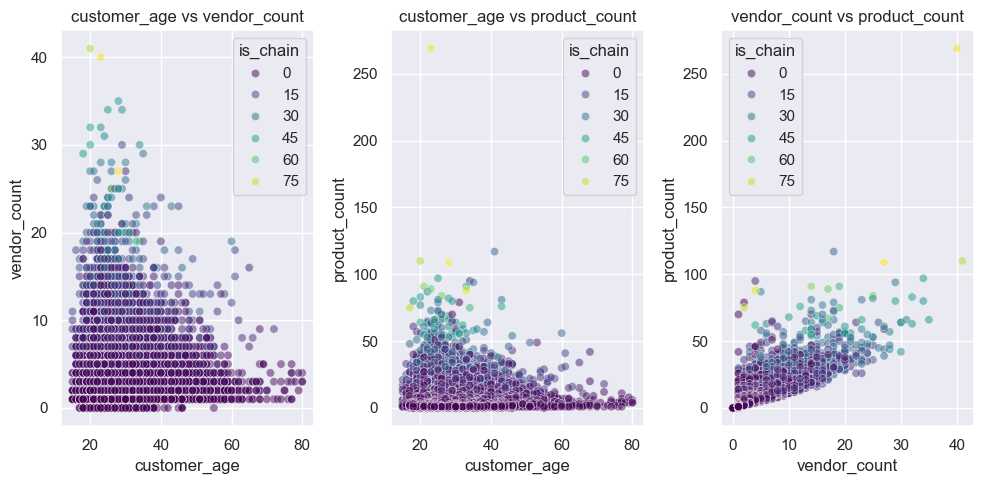

In [64]:
# Define the variables you want to plot
variables = ['customer_age', 'vendor_count', 'product_count']

# Create a figure for the plots with adjusted height
plt.figure(figsize=(10, 5))  # Set width to 10 and height to 5

# Create unique pairs of the variables
unique_pairs = list(itertools.combinations(variables, 2))

# Loop through the unique combinations to create scatter plots
for i, (var1, var2) in enumerate(unique_pairs):
    plt.subplot(1, len(unique_pairs), i + 1)  # Create subplots
    # Scatter plot for each pair with hue based on is_chain
    sns.scatterplot(data=df, x=var1, y=var2, hue='is_chain', alpha=0.5, palette='viridis')
    plt.xlabel(var1)  # X-axis label
    plt.ylabel(var2)  # Y-axis label
    plt.title(f'{var1} vs {var2}')  # Title for each subplot

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Analysis:**
- customar_age vs. product_count vs. is_chain: Customers in the age group between 20 and 40 years old tend to buy in a bigger number of different vendors, while at the same time buying more in chain restaurants. The highest values for number of unique vendors seem to be associated with buying a high number of times in chains for customers in their early 20's.

- customar_age vs. product_count vs. is_chain: Customers in the age group between 20 and 40 years old tend to buy a bigger number of items, while at the same time buying more in chain restaurants. The highest values for number of products seem to be associated with buying a high number of times in chains for customers in their early 20's.

- vendor_count vs. product_count vs. is_chain: Higher values for both vendor count and product count seem to be related with buiyng more times in chain restaurants.

<a class="anchor" id="avgcuiperpromoperpayment">

### **3.6.2** Average spending based on *'CUI_(...)'*  vs.  *'last_promo'*  vs.  *'payment_method'*

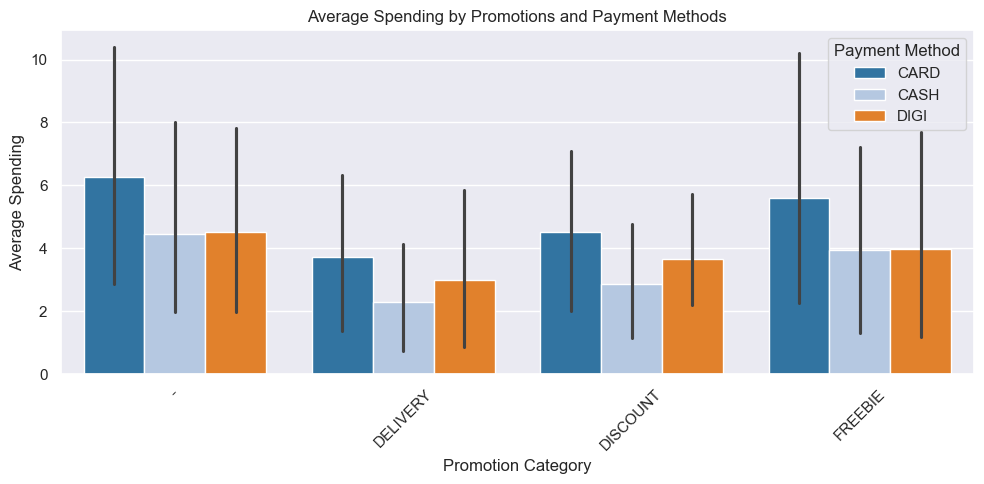

In [65]:
# Get all columns that start with 'CUI_' for the cuisines
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Calculate the average spending based on last_promo and payment_method for all cuisines
promo_payment_spending = df.groupby(['last_promo', 'payment_method'])[cuisine_columns].mean().reset_index()

# Melt the DataFrame to have a long format for plotting
promo_payment_spending_melted = promo_payment_spending.melt(id_vars=['last_promo', 'payment_method'],
                                                              value_vars=['CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian'],
                                                              var_name='Cuisine',
                                                              value_name='Average_Spending')


plt.figure(figsize=(10, 5))
sns.barplot(data=promo_payment_spending_melted,
            x='last_promo',
            y='Average_Spending',
            hue='payment_method',
            palette=palette)

plt.title('Average Spending by Promotions and Payment Methods')
plt.xlabel('Promotion Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()


**Analysis:**

- Customers with the highest average spending have not used any promotion codes and predominantly pay with card.

- Customers with the lowest average spending used the promotion code 'DELIVERY' and paid by cash.

- Card payment is the most popular regardless of the type of promotion or the amount spent.

- For customers who have used the codes “DELIVERY” and “DISCOUNT,” paying in cash is associated with lower spending.

<a class="anchor" id="dataquality">

# **4. Data quality**

</a>





<a class="anchor" id="dq-strangevalues">

## **4.1 Strange Values**

</a>

In [66]:
# Calculate the percentage of customers that have the symbol "-" instead of the region code
total_customers = len(df)
missing_region_count = (df['customer_region'] == '-').sum()
missing_region_percentage = (missing_region_count / total_customers) * 100
print(round(missing_region_percentage,2),"%")

1.39 %


- 1.39% of instances have an unkown location represented by "-".  

In [67]:
# Check instances where either "vendor_count" or "product_count" is zero
zero_vendor_product = df[(df["vendor_count"] == 0) | (df["product_count"] == 0)]

zero_vendor_product

customer_id customer_region  customer_age  vendor_count  product_count  \
1449   4903041977            8670          22.0             0              0   
1476   c94b288475            8670          26.0             0              0   
1488   f687717dc1            8670          21.0             0              0   
2486   c6cf0b76fb            8670          38.0             0              0   
3391   1b7c34738e            8670          24.0             0              0   
...           ...             ...           ...           ...            ...   
31553  0039059c9c            8670          22.0             0              0   
31667  0e60632fe2            8670          23.0             0              0   
31680  28ed1f1e3f            8670          20.0             0              0   
31695  4c06e104de            8670          25.0             0              0   
31730  8d21b0b83c            4660          30.0             1              0   

       is_chain  first_order  last_order last_promo payment_method  ...  \
1449          1          1.0           1   DELIVERY           DIGI  ...   
1476          0          1.0           1   DELIVERY           CASH  ...   
1488          1          1.0           1   DELIVERY           DIGI  ...   
2486          0          2.0           2   DELIVERY           CASH  ...   
3391          0          3.0           3          -           CASH  ...   
...         ...          ...         ...        ...            ...  ...   
31553         1         88.0          88   DISCOUNT           CARD  ...   
31667         0         89.0          89   DISCOUNT           CARD  ...   
31680         0         89.0          89   DELIVERY           DIGI  ...   
31695         1         89.0          89          -           CASH  ...   
31730         0         89.0          89   DELIVERY           DIGI  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
1449       0      0      0      0      0      0      0      0      0      0  
1476       0      0      0      0      0      0      0      0      0      0  
1488       0      0      0      0      0      0      0      0      0      0  
2486       0      0      0      0      0      0      0      0      0      0  
3391       0      0      0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
31553      0      0      0      0      0      0      0      0      0      0  
31667      0      0      0      0      0      0      0      0      0      0  
31680      0      0      0      0      0      0      0      0      0      0  
31695      0      0      0      0      0      0      0      0      0      0  
31730      0      0      0      0      0      0      0      0      0      0  

[156 rows x 56 columns]

- The dataset has 156 instances where either vendor_count or product_count has a value of 0. This seems to be a data collection error, given we have valid values for last_order and payment_method.

- This rows may have to be deleted as they do not reflect valid entries.

<a class="anchor" id="dq-duplicates">

## **4.2 Duplicates**

In [68]:
# Check for duplicated customers
duplicates = df[df.duplicated(keep=False)]
duplicates

customer_id customer_region  customer_age  vendor_count  product_count  \
3355   b55012ee1c            8550          23.0             4             11   
3379   b55012ee1c            8550          23.0             4             11   
7867   24251eb7da            8550          28.0             4              8   
7887   24251eb7da            8550          28.0             4              8   
16227  671bf0c738            8550          25.0             4              7   
16230  671bf0c738            8550          25.0             4              7   
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   
24328  df91183978            8550          23.0             2              3   
24329  df91183978            8550          23.0             2              3   
24822  6bbf5f74cd            8550          22.0            10             20   
24827  6bbf5f74cd            8550          22.0            10             20   
25792  8aa9bbc147            8550          24.0             2              4   
25793  8aa9bbc147            8550          24.0             2              4   
27514  cf563a0a98            8550          27.0             2              2   
27515  cf563a0a98            8550          27.0             2              2   
27653  201a13a34d            8550          28.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28706  06018a56be            8550          27.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29922  fac7984c0d            8550          29.0             1              1   
29926  fac7984c0d            8550          29.0             1              1   
30402  b8e7a643a4            8550          18.0             2              4   
30416  b8e7a643a4            8550          18.0             2              4   
31639  cc08ef25ce            8550          31.0             1              2   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  ...  \
3355          1          2.0          89    FREEBIE           CARD  ...   
3379          1          2.0          89    FREEBIE           CARD  ...   
7867          3          7.0          85          -           CARD  ...   
7887          3          7.0          85          -           CARD  ...   
16227         3         23.0          66    FREEBIE           CARD  ...   
16230         3         23.0          66    FREEBIE           CARD  ...   
20855         0         35.0          35          -           CARD  ...   
20907         0         35.0          35          -           CARD  ...   
24328         1         47.0          52   DELIVERY           CARD  ...   
24329         1         47.0          52   DELIVERY           CARD  ...   
24822         9         48.0          88          -           CARD  ...   
24827         9         48.0          88          -           CARD  ...   
25792         2         53.0          59   DELIVERY           DIGI  ...   
25793         2         53.0          59   DELIVERY           DIGI  ...   
27514         0         61.0          62    FREEBIE           CASH  ...   
27515         0         61.0          62    FREEBIE           CASH  ...   
27653         1         62.0          62   DELIVERY           CARD  ...   
27739         1         62.0          62   DELIVERY           CARD  ...   
28706         0         67.0          89    FREEBIE           DIGI  ...   
28713         0         67.0          89    FREEBIE           DIGI  ...   
29922         0         75.0          75   DELIVERY           CARD  ...   
29926         0         75.0          75   DELIVERY           CARD  ...   
30402         0         78.0          78    FREEBIE           CASH  ...   
30416         0         78.0          78    F

In [69]:
# Count how many customers are duplicated
df.duplicated().sum()

13

- There are 13 duplicated customers, this seems to be an error when retrieving the data.

- The duplicated values should be removed for an accurate analysis.

<a class="anchor" id="dq-missvalues">

## **4.3 Missing values**

In [70]:
# Count of missing values for every column
df.isna().sum()


customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [71]:
# Calculate the percentage of missing values for all columns
percentage_nan = round((df.isna().sum() / len(df) * 100),2)

percentage_nan

customer_id                 0.00
customer_region             0.00
customer_age                2.28
vendor_count                0.00
product_count               0.00
is_chain                    0.00
first_order                 0.33
last_order                  0.00
last_promo                  0.00
payment_method              0.00
CUI_American                0.00
CUI_Asian                   0.00
CUI_Beverages               0.00
CUI_Cafe                    0.00
CUI_Chicken Dishes          0.00
CUI_Chinese                 0.00
CUI_Desserts                0.00
CUI_Healthy                 0.00
CUI_Indian                  0.00
CUI_Italian                 0.00
CUI_Japanese                0.00
CUI_Noodle Dishes           0.00
CUI_OTHER                   0.00
CUI_Street Food / Snacks    0.00
CUI_Thai                    0.00
DOW_0                       0.00
DOW_1                       0.00
DOW_2                       0.00
DOW_3                       0.00
DOW_4                       0.00
DOW_5     

- customer_age: 2.28% of the entries are missing, this could be because of errors in collecting the data or the customers preference to not share their age, given this is personal data. The possible approaches will be evaluated on how it will affect the customer segmentation.

- first_Order: 0.33% of the rows have missing values, a possible connection with the variable last_order will be further explored.

- HR_0: The dataset has a missing values percentage of 3.65% for this variable, there may have been an error collecting the data. For this case we could explore a way to get this values by checking the difference between total orders and the orders made at another hours.

In [72]:
# Further analyze missing values for first_order
# Filter rows where 'first_order' is NaN and select only the 'first_order' and 'last_order' columns
na_first_order = df[df['first_order'].isna()][['first_order', 'last_order']]

# Display
print(na_first_order)

       first_order  last_order
31782          NaN           0
31783          NaN           0
31784          NaN           0
31785          NaN           0
31786          NaN           0
...            ...         ...
31883          NaN           0
31884          NaN           0
31885          NaN           0
31886          NaN           0
31887          NaN           0

[106 rows x 2 columns]


In [73]:
# Filter rows where 'first_order' is NaN
na_first_order = df[df['first_order'].isna()]

# Check if all values of 'last_order' in these rows are equal to 0
all_last_order_zero = (na_first_order['last_order'] == 0).all()

# Display the result
if all_last_order_zero:
    print("Whenever 'first_order' is NaN, 'last_order' is 0.")
else:
    print("There are instances where 'first_order' is NaN and 'last_order' is not 0.")

Whenever 'first_order' is NaN, 'last_order' is 0.


In [74]:
matching_orders = df[df['last_order'] == df['first_order']]
matching_orders[['first_order', 'last_order']]

first_order  last_order
1436           1.0           1
1437           1.0           1
1438           1.0           1
1439           1.0           1
1440           1.0           1
...            ...         ...
31777         89.0          89
31778         89.0          89
31779         89.0          89
31780         89.0          89
31781         90.0          90

[7192 rows x 2 columns]

- If last_order is 0 (indicating the first day of the database, meaning 0 days have passed), then first_order cannot be a negative value. Thus, it must also correspond to 0, indicating that both first_order and last_order are equal in this case.

- We can see that for other cases where the customer only made one order for the last 3 months, the value for first_order and last_order correspond. This reinforces that when last_order is 0, first_order should also be 0.

<a class="anchor" id="preprocessing">

# **5. Preprocessing**

<a class="anchor" id="correctdatatype">

## **5.1 Correcting Data Types**

In [75]:
# Change the following variables from float to int
df['customer_age'] = df['customer_age'].astype("Int64")
df['first_order'] = df['first_order'].astype("Int64")
df['HR_0'] = df['HR_0'].astype("Int64")

# Check the changes
print(df.dtypes)

customer_id                  object
customer_region              object
customer_age                  Int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                   Int64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

<a class="anchor" id="removedup">

## **5.2 Removing Duplicates**


In [76]:
# Remove duplicated instances
df = df.drop_duplicates()


<a class="anchor" id="setindex">

## **5.3 Set index**

In [77]:
# Set 'customer_id' as the index, since we don't have duplicates anymore
df.set_index('customer_id', inplace=True)

<a class="anchor" id="missingvalues">

## **5.4 Missing Values**

In [78]:
print(df.isna().sum()[df.isna().sum() > 0])

customer_age     727
first_order      106
HR_0            1164
dtype: int64


- customer_age: 2.28% of the entries are missing, since this is a low percentage it is not enough reason to remove this variable. As we want to retain as much information as possible for our analysis, we decided to impute the median for the missing values rather than removing the rows. We are aware this approach may introduce some bias into the clustering process, but we believe it is justified by the benefit of retaining additional information.

- first_order: Given our previous conclusion on the missing values for this variable, we will proced with inputing the value 0.

- HR_0: Since we don't have missing values for the number of orders in other hours (1-23), and the number of order by days of the week have no missing values either, we can calculate the true values to replace the missing values in this variable. If total orders by hours = total orders by day, we have:  orders at midnight = sum of orders for all days of the week - sum of orders for the other hours (1-23).

In [79]:
# Replace missing values in 'customer_age' with the median value of the column
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())

In [80]:
# Impute missing values in 'first_order' by replacing NaNs with 0
df['first_order'] = df['first_order'].fillna(0)

In [81]:
# Calculate and impute missing values in 'HR_0'
# The value of 'HR_0' is determined by subtracting the sum of 'HR_1' to 'HR_23' from the total orders across all days
df['HR_0'] = df['HR_0'].fillna(df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1) - df[[f'HR_{i}' for i in range(1, 24)]].sum(axis=1))

In [82]:
# To check if the sum of orders by day of the week and the sum of orders by hour it's the same in all rows
mismatch_rows = df[(df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1))
                   != (df[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9',
                           'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17',
                           'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1).astype(int))]
print(len(mismatch_rows))

0


In [83]:
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


<a class="anchor" id="strangevalues">

## **5.5 Strange values**


- customer_region: Given that we don't know the region of the customers that have the value "-" associated with this variable, we decided to replace this symbol with the mode for this varibles. We decided on this approach for 3 reasons:
  - We believe it's more effective to impute the mode for missing region in order to keep this instances information in other useful variables, over deleting the corresponding rows, as it retains more data for analysis.
  - The percentage of such instances is low, so the variable is still valuable and interpretable and should not be removed.
  - Since this is a categorical variable creating a label for these customers could group them as if they shared a common region, which is likely not the case.

- last_promo: As previously stated we belive the "-" represents costumers who did not use a promotion code, indicating a common trait among these customers. Since this is a categorical variable, it makes sense to create a category for those who did not use a promotion code. So, we decided to label this symbol as "No Promo Code."

- vendor_count and product_count: Given that the variables payment_method and last_order have no missing values we assume all customers have made at least one order. So a value of 0 for this variables seems to be an inconsistency and does not represent true values. In this case we decided to remove the rows where this happens.


In [84]:
# Substitute the "-" values in last_promotion with a label indicating those customer did not use a promotion code
df['last_promo'] = df['last_promo'].replace('-', 'No Promo Code')

In [85]:
# Get the mode for the customer_region variable
mode_region = df.loc[df['customer_region'] != '-', 'customer_region'].mode()[0]

# Substitute the "-" values with the mode
df['customer_region'] = df['customer_region'].replace('-', mode_region)

In [86]:
# Drop rows with 'vendor_count' or 'product_count' equal to 0
df = df[(df['vendor_count'] != 0) & (df['product_count'] != 0)]

<a class="anchor" id="furtexprel">

# **6. Further exploring relatioships**

<a class="anchor" id="newfeatures">

## **6.1 New features**

**Metadata**
- weekend_orders: Captures the total orders placed from Monday to Friday.
- weekdays_orders: Captures the total orders placed on Saturday and Sunday.
- breakfast, lunch, snack, dinner, late_night: Result of grouping individual hour based orders into categories according to meal times: Breakfast, Lunch, Snach, Dinner and Late-night.
- age_group: Categorizes customer age into three groups: Young (0-24), Adult (25-59), and Senior (60+).
- use_promo: Indicates whether a ever customer has used a promotion code.
- total_orders: Represents the cumulative number of orders placed by each customer.
- total_spent: Indicates the total spending amount for each customer across all orders.

**Groupig orders by weekdays and weekends:**
- Reducing daily orders (seven columns) to just two columns simplifies the dataset, decreasing its dimensionality. Lower dimensions improve clustering performance and computational efficiency.
- By dividng orders between weekdays and weekends, it becomes easier to observe trends in customer behavior as the segmentation becomes more interpretable.

**Grouping Orders by Meal Times:**
- Reduces the number of columns (24 individual hours) to more manageable categories, which can be helpful to clustering by reducing noise and improving interpretability.
- Time-based grouping provides a clearer view of order patterns, which can be easily plotted and analyzed.

**Grouping Age into Categories:**
- Simplifies age data, making it easier to identify trends and patterns in customer segments.
- Age groups help in comparing purchasing behaviors and preferences.

**Use of promotion code:**
- This variable helps analyze which segments are more likely to use promotion code.

**Total Orders:**
- This is feature is a good indicator of customer activity.
- Using this variable for clustering can help differenciate between more and less active costumers.

**Total Spent:**
- This feature makes it easier to identify customers expenditure.
- This feature allows easy segmentation of high spending customers vs. low spending.










In [87]:
# Create a new column 'weekend_orders'
# The column states the number of orders the client did on the weekends
df['weekend_orders'] = df['DOW_0'] + df['DOW_6']

In [88]:
# Create a new column 'weekdays_orders'
# The column states the number of orders the client did on weekdays
df['weekdays_orders'] = df['DOW_1'] + df['DOW_2'] + df['DOW_3'] + df['DOW_4'] + df['DOW_5']

In [89]:
# Create variables with the number of orders for each meal time
# Each column states the number of orders the client did for each meal time

hour_columns = [f'HR_{i}' for i in range(24)]

df['breakfast'] = df[hour_columns[6:11]].sum(axis=1)
df['lunch'] = df[hour_columns[11:15]].sum(axis=1)
df['snack'] = df[hour_columns[15:18]].sum(axis=1)
df['dinner'] = df[hour_columns[18:22]].sum(axis=1)
df['late_night'] = df[hour_columns[22:] + hour_columns[:6]].sum(axis=1)


In [90]:
# Create 'age_group' to classify customers by age
# Assign 'young' if age < 25, 'adult' if 25 <= age < 60, 'senior' if age >= 60
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 24, 59, 120], labels=['young', 'adult', 'senior'], right=False)

In [91]:
# Create 'use_promo' as a binary column (1 if the customer used a promotion, 0 if they did not)
# Consider '-' in 'last_promo' as no promotion used
df['use_promo'] = (df['last_promo'] != '-').astype(int)

In [92]:
# Create 'total_orders' to sum all orders made during the week
df['total_orders'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

In [93]:
# Select all the columns that starts with "CUI_"
cui_columns = [col for col in df.columns if col.startswith('CUI_')]
# Calculate 'total_spent' by summing all the spent across all cuisine types
df['total_spent'] = df[cui_columns].sum(axis=1)

In [94]:
df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360            18             2              5   
5d272b9dcb             8670            17             2              2   
f6d1b2ba63             4660            38             1              2   
180c632ed8             4660            26             2              3   
4eb37a6705             4660            20             2              5   

             is_chain  first_order  last_order     last_promo payment_method  \
customer_id                                                                    
1b8f824d5e          1            0           1       DELIVERY           DIGI   
5d272b9dcb          2            0           1       DISCOUNT           DIGI   
f6d1b2ba63          2            0           1       DISCOUNT           CASH   
180c632ed8          1            0           2       DELIVERY           DIGI   
4eb37a6705          0            0           2  No Promo Code           DIGI   

             CUI_American  ...  weekdays_orders  breakfast  lunch  snack  \
customer_id                ...                                             
1b8f824d5e           0.00  ...                0          0      0      0   
5d272b9dcb          12.82  ...                0          1      1      0   
f6d1b2ba63           9.20  ...                0          1      1      0   
180c632ed8           0.00  ...                1          0      2      0   
4eb37a6705          14.57  ...                1          2      0      0   

             dinner  late_night  age_group  use_promo  total_orders  \
customer_id                                                           
1b8f824d5e        2           0      young          1             2   
5d272b9dcb        0           0      young          1             2   
f6d1b2ba63        0           0      adult          1             2   
180c632ed8        0           0      adult          1             2   
4eb37a6705        0           0      young          1             2   

             total_spent  
customer_id               
1b8f824d5e         28.88  
5d272b9dcb         19.21  
f6d1b2ba63          9.20  
180c632ed8         31.56  
4eb37a6705         55.44  

[5 rows x 66 columns]

<a class="anchor" id="statstest">

## **6.2 Statistical testing for new features**

</a>

- The new variables allow us to further explore relationsips in the dataset. We will perform statistical tests to identify patterns in customer behavior.

*'total_spent'* vs *'customer_region'*

In [95]:
# One-way ANOVA for difference in total spent across regions
model = ols('total_spent ~ C(customer_region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq       df           F  PR(>F)
C(customer_region)  4.661576e+06      7.0  331.124485     0.0
Residual            6.377543e+07  31711.0         NaN     NaN


- Given the very low p-value, we conclude that there is a statistically significant difference in spending patterns across different regions. This indicates that customer region has a meaningful impact on the amount spent.

*'total_spent'* vs *'age_group'*

In [96]:
# One-way ANOVA for difference in total spent across age groups
model = ols('total_spent ~ C(age_group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq       df        F    PR(>F)
C(age_group)  2.118380e+04      2.0  4.91016  0.007377
Residual      6.841582e+07  31716.0      NaN       NaN


- We conclude that there is a statistically significant difference between age_group for the total spent. This suggests that variations in the total spending can be associated with differences between age groups.

*'weekdays_orders'* vs *'weekend_orders'*

In [97]:
# t-test for statistically significant difference
# in the average number of orders between weekdays and weekends
t_stat, p_value = stats.ttest_ind(df['weekdays_orders'], df['weekend_orders'])
print(f"T-test for Weekdays vs. Weekend Orders: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-test for Weekdays vs. Weekend Orders: t-statistic = 79.3195, p-value = 0.0000


- There is a statistically significant difference between the number of weekdays and weekend orders.

*'total_spent'* vs. *'total_orders'*

In [98]:
# t-test for statistically significant difference difference
# in the total number of orders between high spenders and low spenders
# assuming high spenders as top 50% and low spenders as bottom 50%
high_spenders = df['total_spent'] >= df['total_spent'].quantile(0.5)
high_spender_orders = df[high_spenders]['total_orders']
low_spender_orders = df[~high_spenders]['total_orders']

t_stat_spending, p_value_spending = stats.ttest_ind(high_spender_orders, low_spender_orders)
print(f"T-test for high vs. low Spending on total orders: t-statistic = {t_stat_spending:.4f}, p-value = {p_value_spending:.4f}")

T-test for high vs. low Spending on total orders: t-statistic = 83.5083, p-value = 0.0000


- There is a statistically significant difference between the total orders of high-spending and low-spending customers.

In [99]:
# Create a contingency table
contingency_table = pd.crosstab(df['use_promo'], df['age_group'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 0.0, p-value: 1.0


 - There is no significant relationship between these two variables, this suggests that customers' age groups do not influence whether or not they use promotional codes.